In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
from scipy.stats import uniform, norm

from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder

from PIL import Image


print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Sklearn way

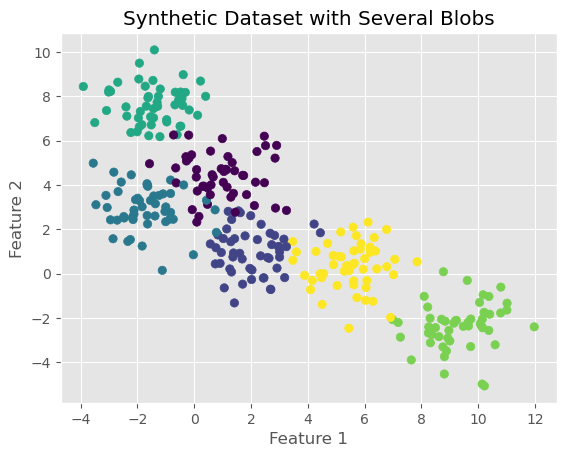

In [3]:
# Create a dataset with 3 blobs
X, y = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=1.0, random_state=0)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [4]:
X_extra, y_extra = make_blobs(n_samples = 150, centers=3, n_features=2, cluster_std=1.0, random_state=123)

no_samples = len(X_extra)
y_extra = np.random.randint(7, 10, no_samples)

X = np.vstack([X, X_extra.copy()])
y = np.hstack([y, y_extra.copy()])



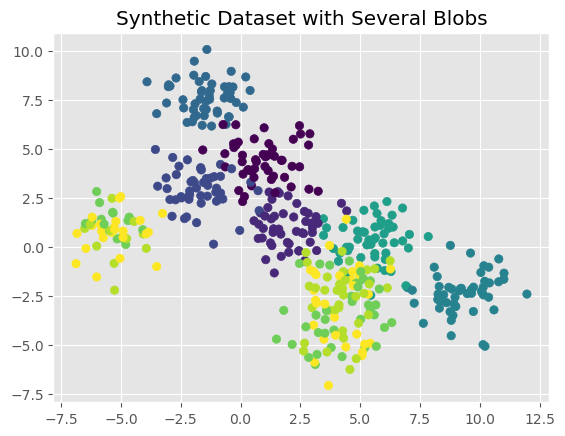

In [5]:
# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.show()

Numpy way

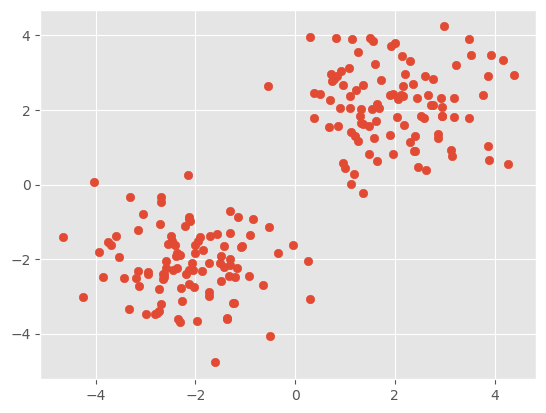

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

labels = []

# Generate samples
data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine the data from the two clusters
data = np.vstack((data1, data2))

# Plot
plt.scatter(data[:, 0], data[:, 1])
plt.show()


# Class for creating dataset

In [29]:
class SyntheticDataset:
    def __init__(self, image_path):
        self.image_path = image_path
        self.dataset = None

    def get_dataset(self):
        return self.dataset
    
    def get_image_path(self):
        return self.image_path
    
    def generate_data_from_img(self):
        # Open the image
        img = Image.open(self.image_path)

        # Convert the image to RGBA (if it's not already in that format)
        img = img.convert("RGBA")

        # Get the size of the image
        width, height = img.size

        # Prepare a list to hold coordinates and color of colored points
        data = []

        # Loop through each pixel in the image
        for i in range(width):
            for j in range(height):

                # Get the color of the pixel (excluding alpha channel for simplicity)
                r,g,b,a = img.getpixel((i, j))
                if (r,g,b) == (237, 28, 36):
                    data.append((np.array([i,j]), np.array([r,g,b]),'red'))
                if (r,g,b) == (255, 127, 29):
                    data.append((np.array([i,j]), np.array([r,g,b]),'orange'))
                if (r,g,b) == (34, 177, 76):
                    data.append((np.array([i,j]), np.array([r,g,b]),'green'))
                if (r,g,b) == (255, 242, 0) or (r,g,b) == (255, 201, 14):
                    data.append((np.array([i,j]), np.array([r,g,b]),'yellow'))
                if (r,g,b) == (63, 72, 204):
                    data.append((np.array([i,j]), np.array([r,g,b]),'blue'))     

        dataset = pd.DataFrame(data, columns=['coordinate', 'rgb', 'class'])
        self.dataset = dataset
    
    def one_hot_enc(self, column):
        one_hot_df = pd.get_dummies(self.dataset, columns = [column])

        return one_hot_df
    
    def transform_to_numeric_classes(self, labels_col):
        encoder = LabelEncoder()
        df_numeric_classes = self.dataset.copy()
        df_numeric_classes[f'{labels_col}'] = encoder.fit_transform(df_numeric_classes[f'{labels_col}'])

        return df_numeric_classes

    def plot_data(self):
        df = self.dataset

        plt.figure(figsize=(8,6))

        for label in df['class'].unique():
            class_data = df[df['class'] == label]
            data_x = [coord[0] for coord in class_data['coordinate']]
            data_y = [coord[1] for coord in class_data['coordinate']]

            plt.scatter(data_x, data_y, label=f'Class {label}', alpha=0.5, s=0.5)

        # Optional: Invert y-axis to match the image's original coordinate system
        # ax.invert_yaxis()

        # Optional: Add legend and titles
        plt.legend()
        plt.title('Pixel Class Distribution')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()


In [30]:
# Replace 'your_image_path.jpg' with the path to your image
image_path = "C:/Users/Zayan/Documents/code/personal_repos/adaptive vector quantization/assets/dataset1.png"

dataset = SyntheticDataset(image_path)
dataset.generate_data_from_img()
df_numeric_classes = dataset.transform_to_numeric_classes('class')
df = dataset.get_dataset()


In [31]:
df

,coordinate,rgb,class
0,"[346, 229]","[63, 72, 204]",blue
1,"[346, 230]","[63, 72, 204]",blue
2,"[346, 231]","[63, 72, 204]",blue
3,"[346, 232]","[63, 72, 204]",blue
4,"[346, 233]","[63, 72, 204]",blue
...,...,...,...
6143,"[794, 388]","[237, 28, 36]",red
6144,"[794, 389]","[237, 28, 36]",red
6145,"[794, 390]","[237, 28, 36]",red
6146,"[794, 391]","[237, 28, 36]",red


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df['class'].value_counts()

class
red       2560
blue      1518
green     1417
yellow     653
Name: count, dtype: int64

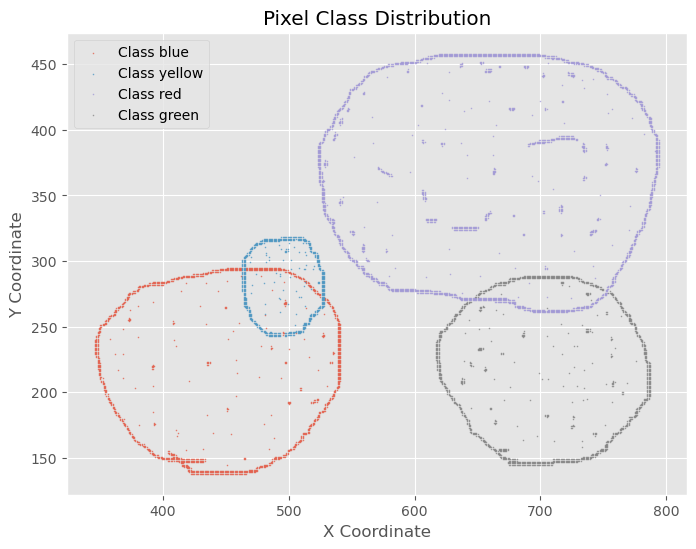

In [19]:
dataset.plot_data()

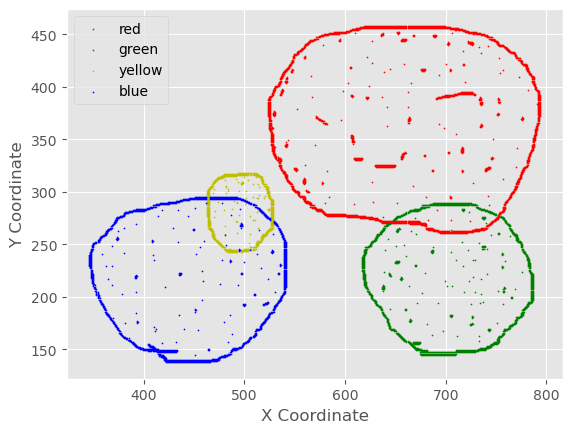

In [23]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# List of colors for plotting, should match the classes in your DataFrame
colors = {'red': 'r', 'green': 'g', 'yellow': 'y', 'blue': 'b'}

# Plot each class with its respective color
for label, color in colors.items():
    subset = df[df['class'] == label]
    subset_x = [coord[0] for coord in subset['coordinate']]
    subset_y = [coord[1] for coord in subset['coordinate']]

    ax.scatter(subset_x, subset_y, c=color, s=0.5, label=label)

# Optional: Invert y-axis to match the image's original coordinate system
# ax.invert_yaxis()

# Optional: Add legend and titles
ax.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


## Neural Gas

In [53]:
class NeuralGas:
    def __init__(self, data, neurons_n, lifetime, epsilon, _lambda, max_iter):
        self.data = data
        self.neurons = self.create_neurons(neurons_n)
        self.connection_matrix = np.zeros((self.neurons.shape[0], self.neurons.shape[0]))
        self.lifetime = lifetime
        self.e = epsilon
        self._lambda = _lambda
        self.max_iter = max_iter

    def run(self):
        for iter in range(self.max_iter):
            print("iter: ", iter)
            choice = np.random.randint(0, self.data.shape[0])
            _input = self.data[choice]
            
            self.ng_one_input(_input)

    def ng_one_input(self, _input):
        # calculate distances
        distances = np.linalg.norm(self.neurons-_input, axis=1)

        # sort neurons by distance from input
        neuron_idx_sorted_by_dist = np.argsort(distances) # e.g. [0.34, 0.65, 0.1] -> [2, 0, 1]
        # sorted_neurons = self.neurons[neuron_idx_sorted_by_dist]

        # make connection between two closest neurons
        self.alter_connection(neuron_idx_sorted_by_dist[0], neuron_idx_sorted_by_dist[1])

        # plot after making connection
        self.plot(_input)

        # update neurons
        for idx, _ in enumerate(self.neurons):
            # print("neuron = ", _)
            # find # of better neurons for each neuron
            k = np.where(neuron_idx_sorted_by_dist==idx)[0][0]
            
            # update
            self.neurons[idx] += self.e * np.exp(-k/self._lambda) * (_input - self.neurons[idx])

            # # plot after change
            # self.plot(_input, self.neurons[idx])

    def alter_connection(self, r_index, c_index):
        # check if connection exists
        if self.connection_matrix[r_index, c_index] < self.lifetime:
            self.connection_matrix[r_index, c_index] += 1 # changing the upper triange only
        else:
            self.connection_matrix[r_index, c_index] = 0
    
    def plot(self, *points):
        fig, ax = plt.subplots()

        ax.scatter(self.neurons[:,0], self.neurons[:,1], marker='X', label='neurons')
        ax.scatter(self.data[:,0], self.data[:,1], s=0.5, label='data')

        if points:
            ax.scatter(points[0][0], points[0][1], label='current input')

            if len(points) > 1:
                ax.scatter(points[1][0], points[1][1], marker='X', label='neuron')

        # find connections in connection matrix
        for r in range(self.connection_matrix.shape[0]):
            for c in range(self.connection_matrix.shape[1]):
                if self.connection_matrix[r,c] > 0:
                    neuron_a = self.neurons[r]
                    neuron_b = self.neurons[c]

                    x_coords = [neuron_a[0], neuron_b[0]]
                    y_coords = [neuron_a[1], neuron_b[1]]

                    line = mlines.Line2D(x_coords, y_coords)
                    ax.add_line(line)                   

        plt.legend()
        plt.show()

    def create_neurons(self, neurons_n, dist='uniform'):
        x_min, y_min = np.amin(self.data, axis=0)
        x_max, y_max = np.amax(self.data, axis=0)

        if dist == 'uniform':
            x_coords = np.random.uniform(x_min, x_max, neurons_n)
            y_coords = np.random.uniform(y_min, y_max, neurons_n)
        
        # create else block for when dist == 'normal' later

        neurons = np.column_stack((x_coords, y_coords))
        return neurons


iter:  0


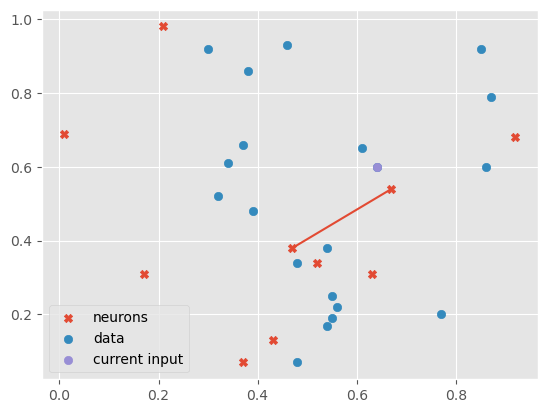

iter:  1


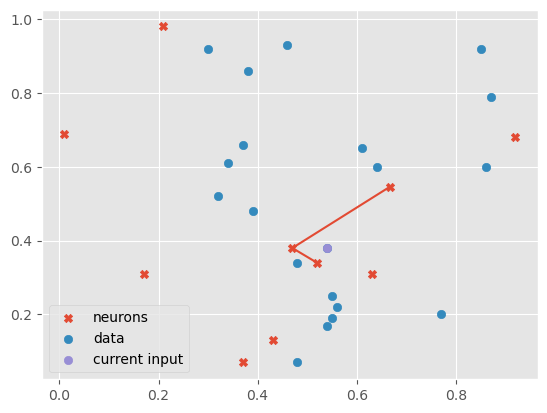

iter:  2


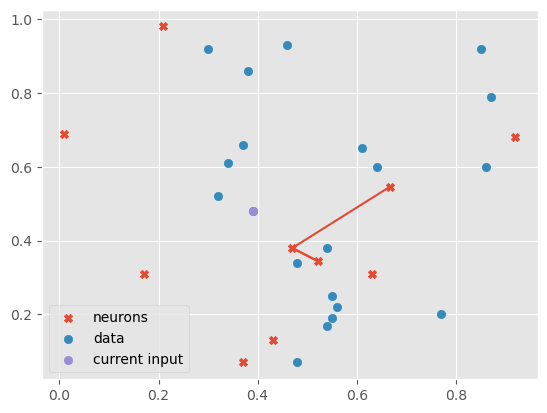

iter:  3


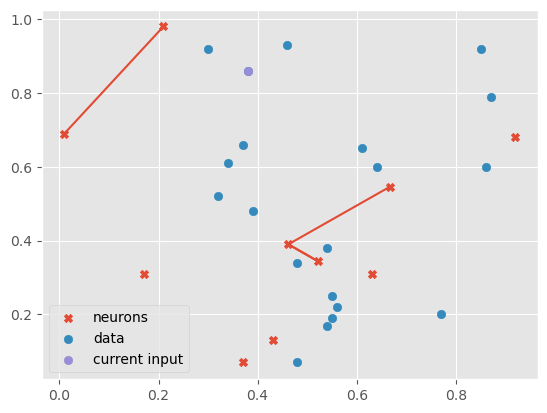

iter:  4


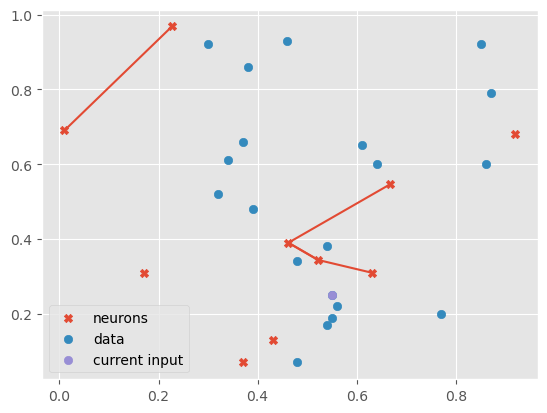

iter:  5


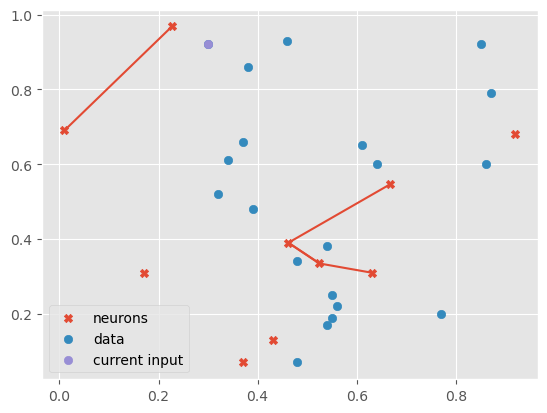

iter:  6


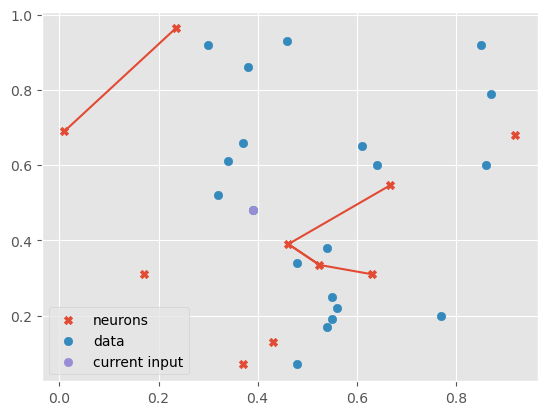

iter:  7


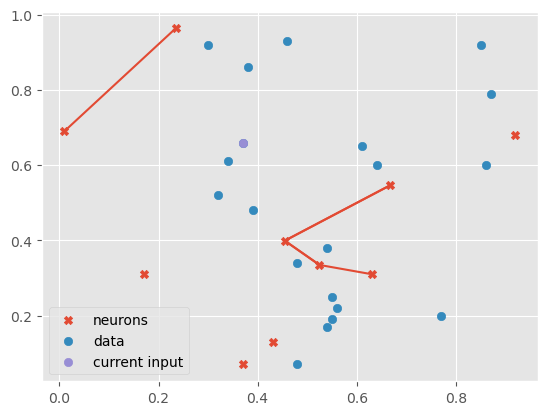

iter:  8


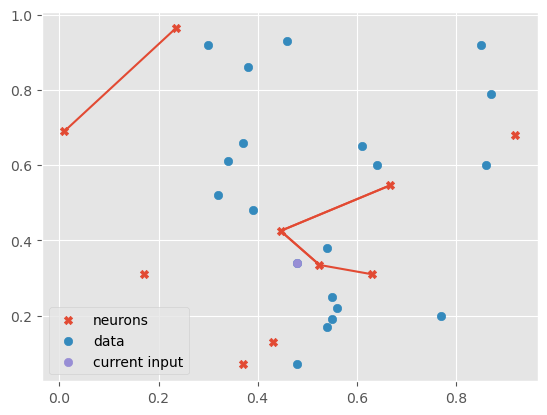

iter:  9


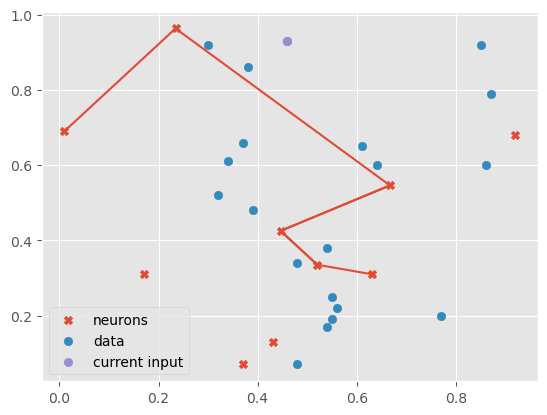

iter:  10


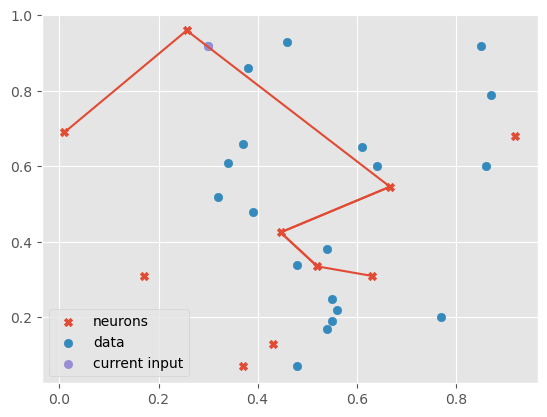

iter:  11


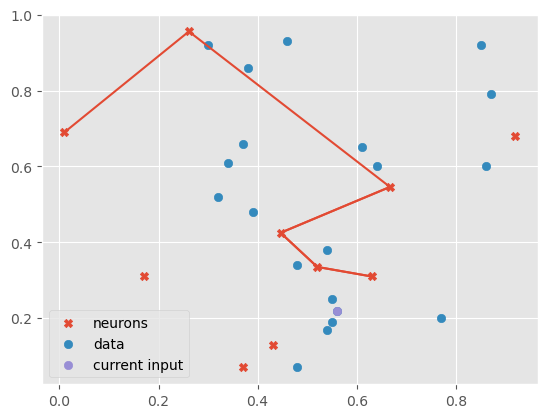

iter:  12


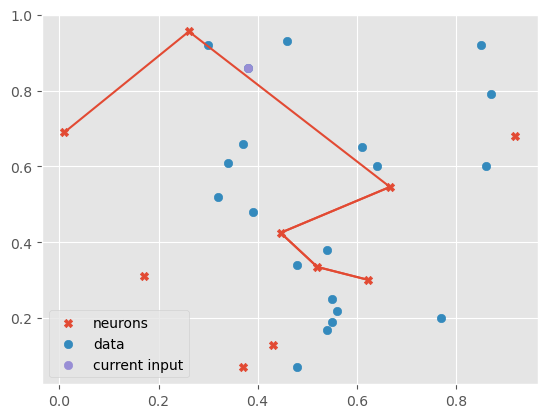

iter:  13


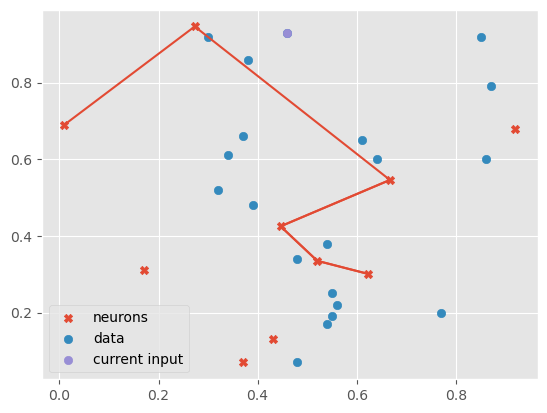

iter:  14


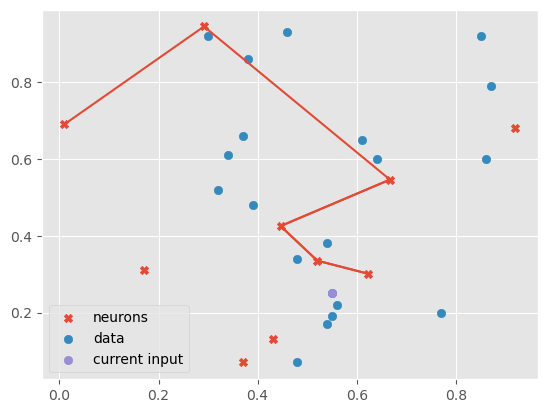

iter:  15


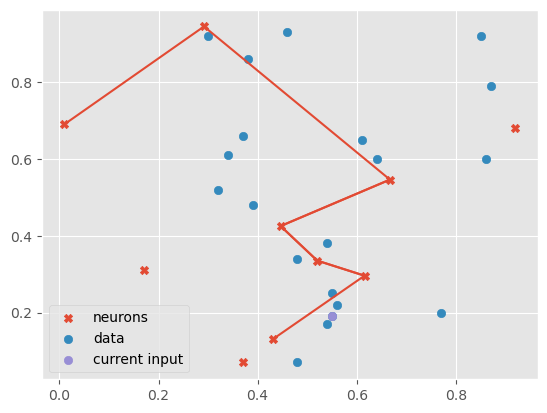

iter:  16


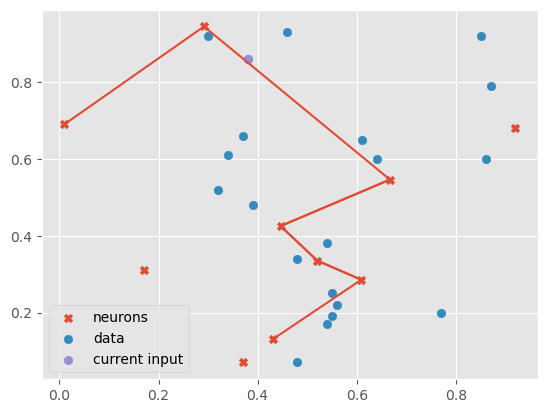

iter:  17


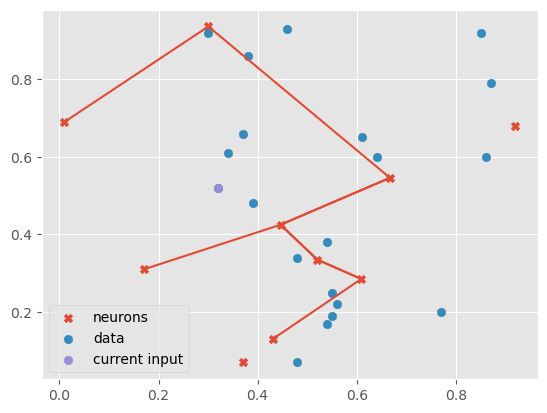

iter:  18


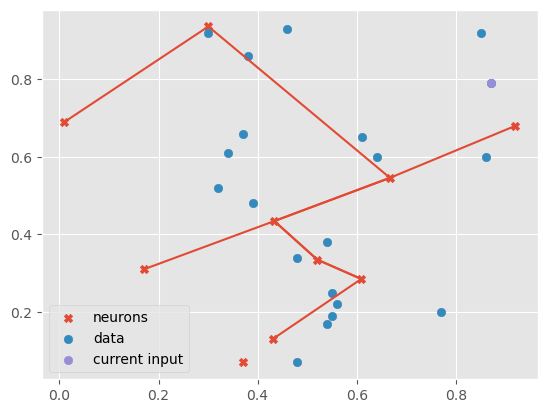

iter:  19


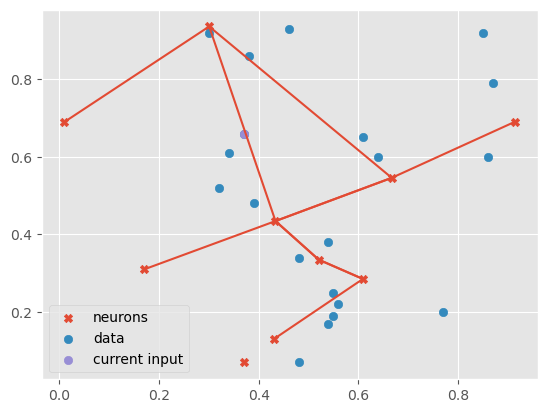

In [80]:
data = np.random.randint(0,100, (20,2))/100
neurons = np.random.randint(0,100, (10,2))/100

ng_algorithm = NeuralGas(neurons, data, 10, 0.1, 0.1, 20)
# ng_algorithm.plot()

# ng_algorithm.ng_one_input(data[0])
ng_algorithm.run()

# Test the algorithm with data

In [32]:
df

,coordinate,rgb,class
0,"[346, 229]","[63, 72, 204]",blue
1,"[346, 230]","[63, 72, 204]",blue
2,"[346, 231]","[63, 72, 204]",blue
3,"[346, 232]","[63, 72, 204]",blue
4,"[346, 233]","[63, 72, 204]",blue
...,...,...,...
6143,"[794, 388]","[237, 28, 36]",red
6144,"[794, 389]","[237, 28, 36]",red
6145,"[794, 390]","[237, 28, 36]",red
6146,"[794, 391]","[237, 28, 36]",red


[[346 229]
 [346 230]
 [346 231]
 ...
 [794 390]
 [794 391]
 [794 392]]


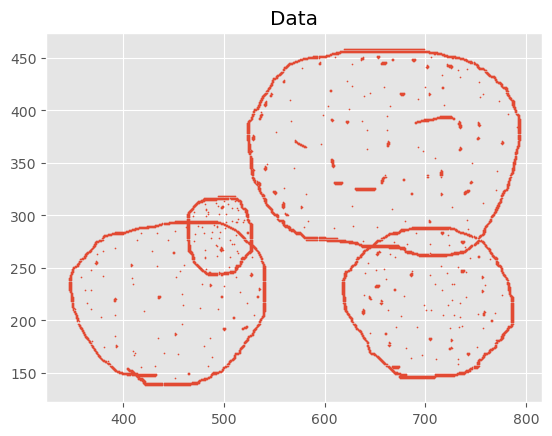

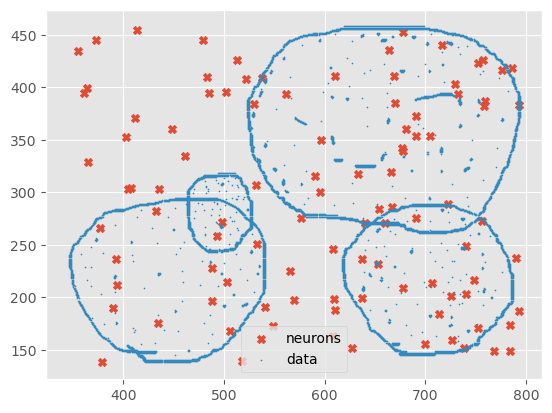

iter:  0


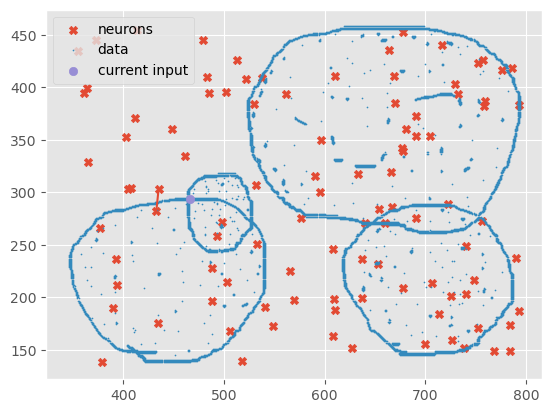

iter:  1


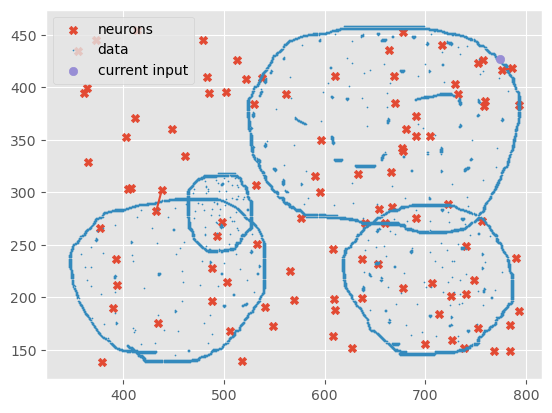

iter:  2


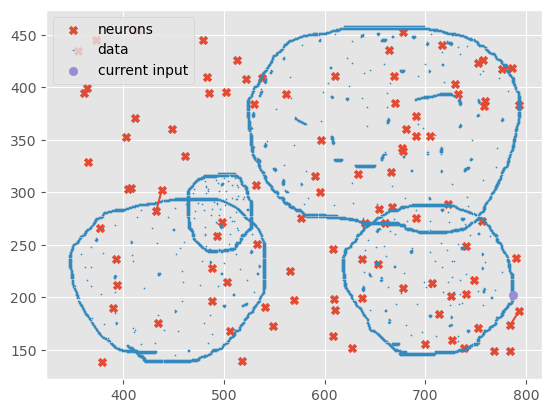

iter:  3


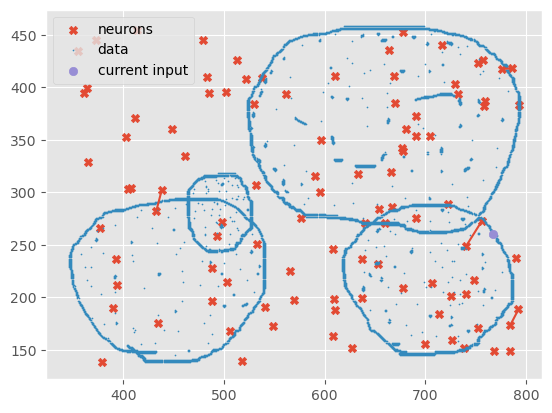

iter:  4


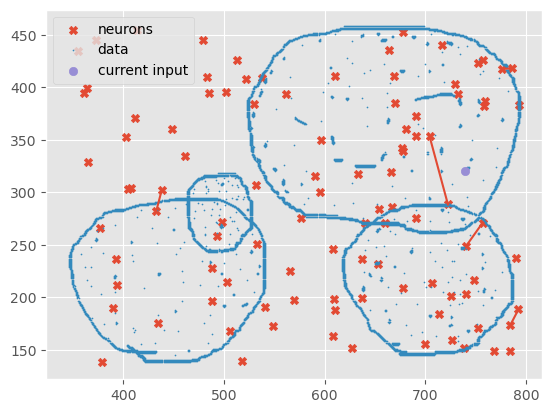

iter:  5


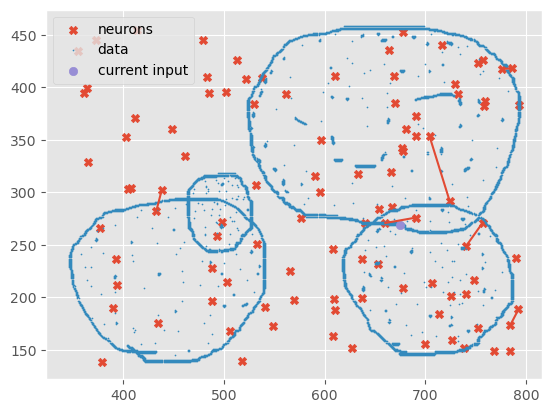

iter:  6


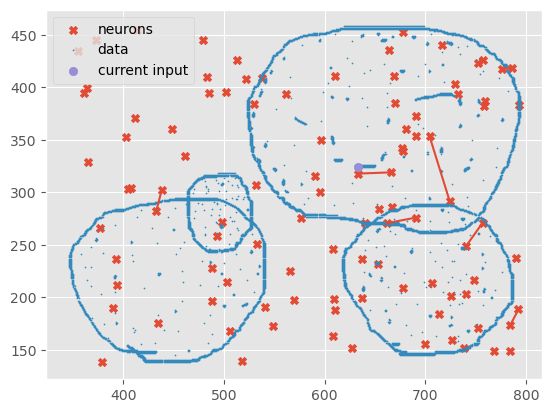

iter:  7


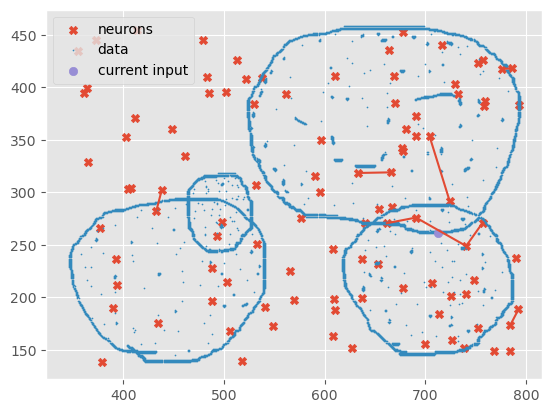

iter:  8


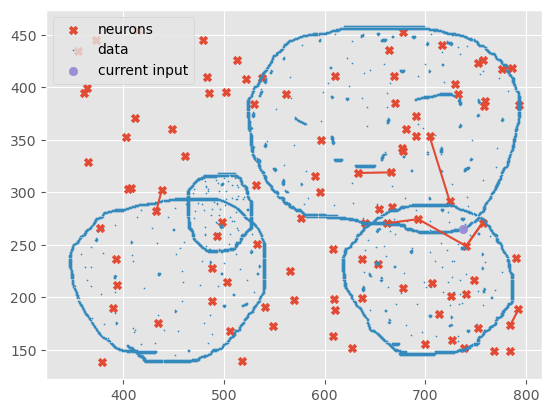

iter:  9


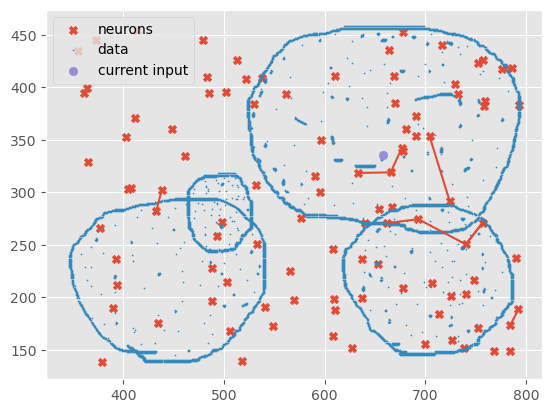

iter:  10


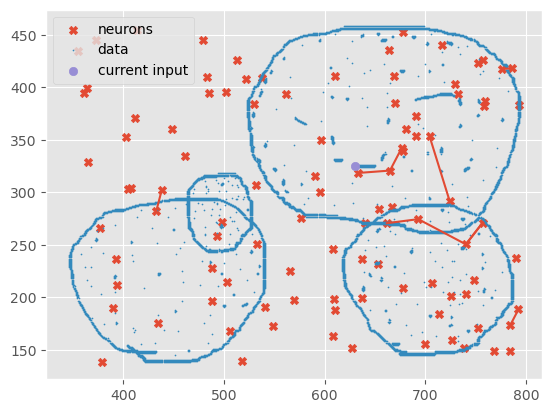

iter:  11


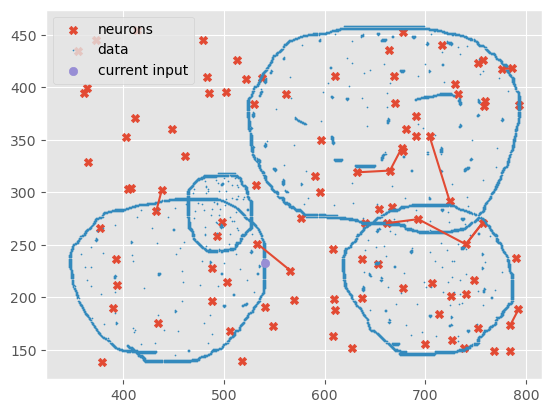

iter:  12


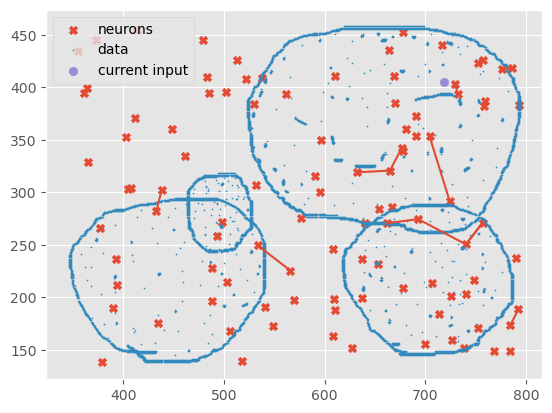

iter:  13


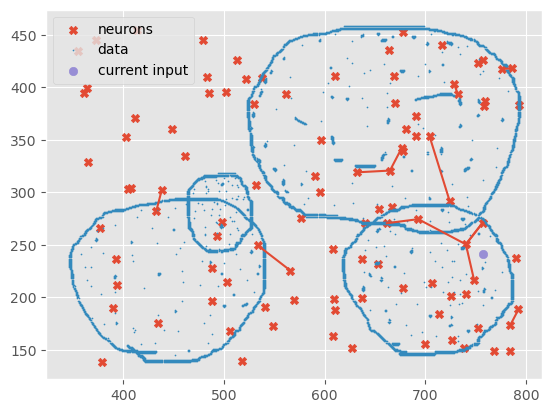

iter:  14


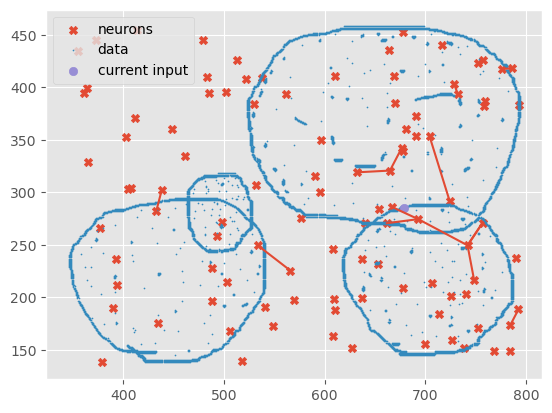

iter:  15


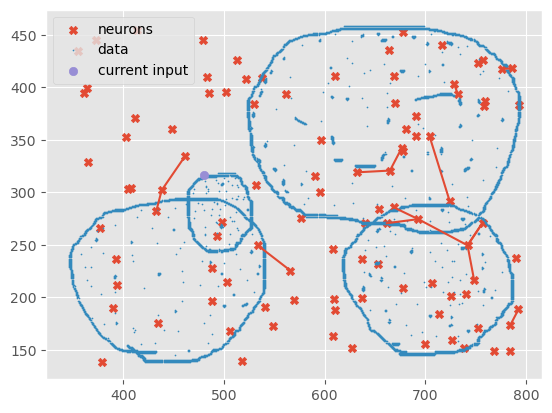

iter:  16


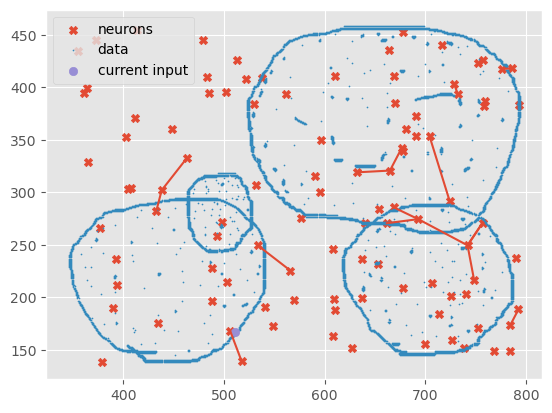

iter:  17


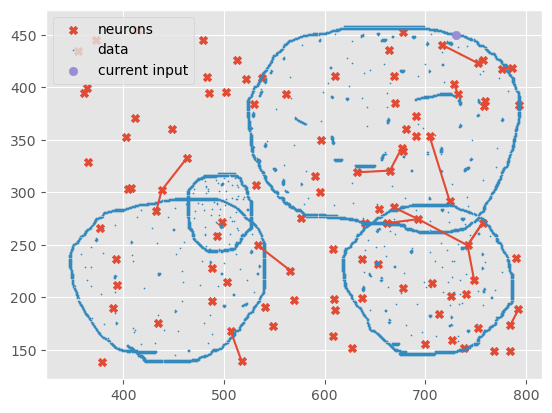

iter:  18


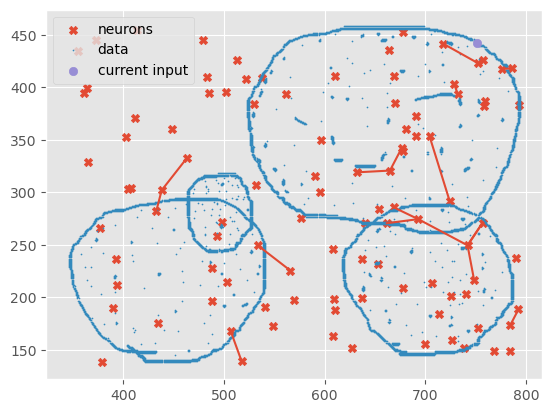

iter:  19


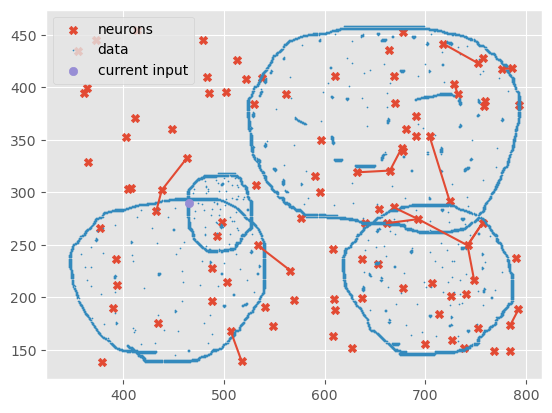

iter:  20


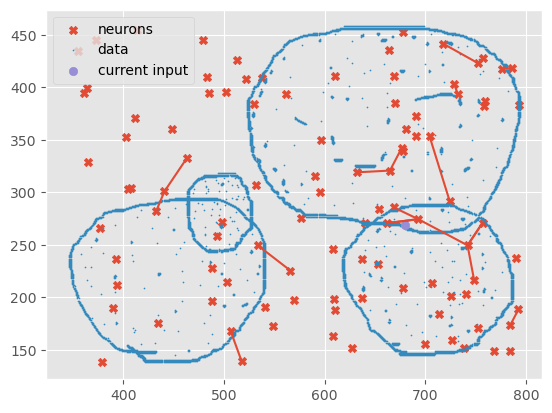

iter:  21


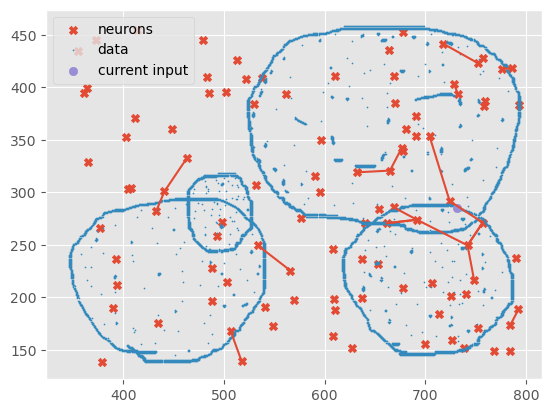

iter:  22


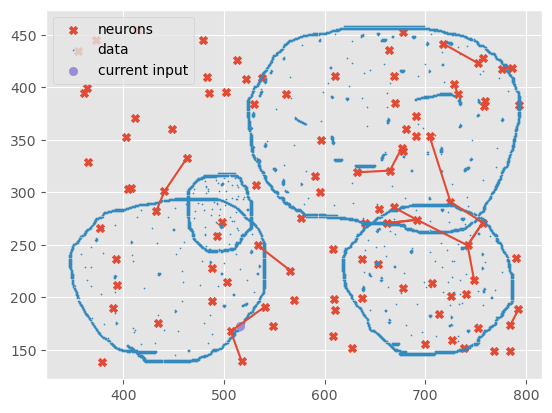

iter:  23


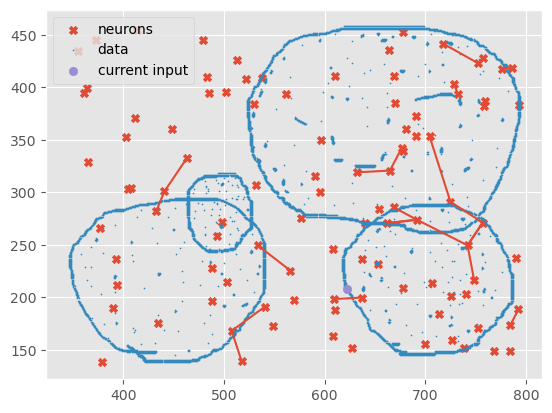

iter:  24


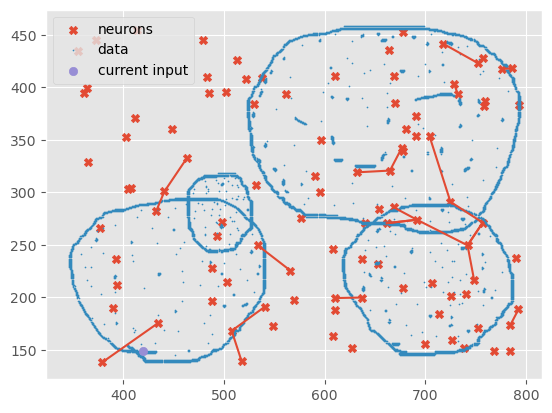

iter:  25


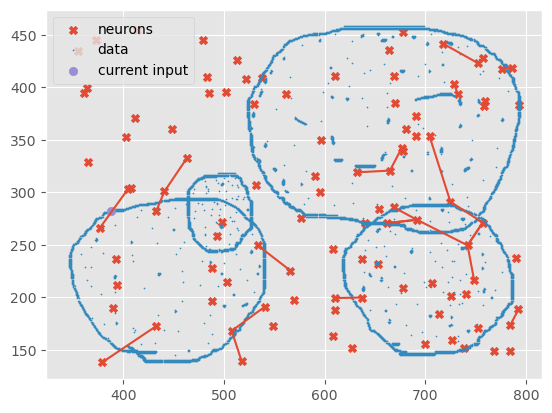

iter:  26


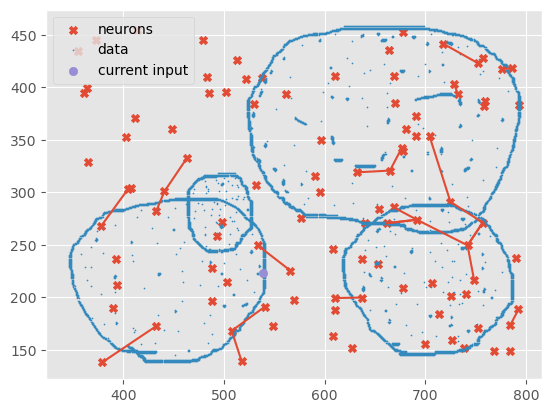

iter:  27


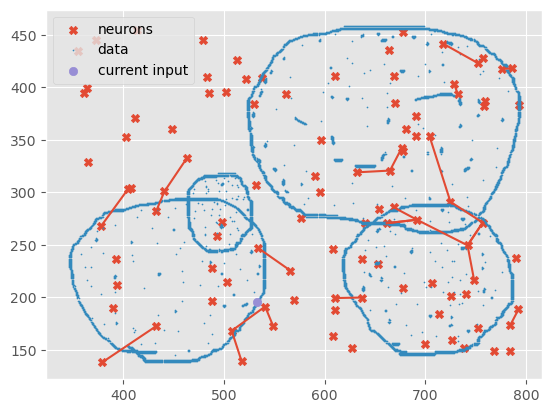

iter:  28


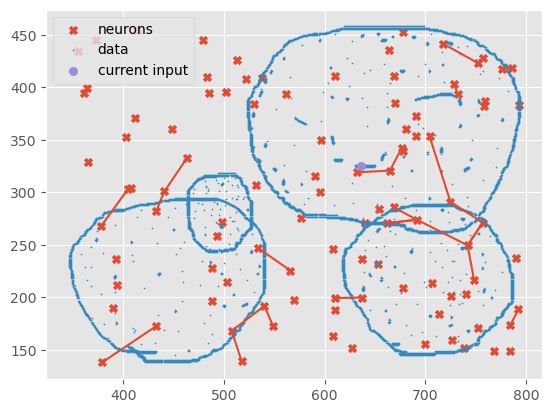

iter:  29


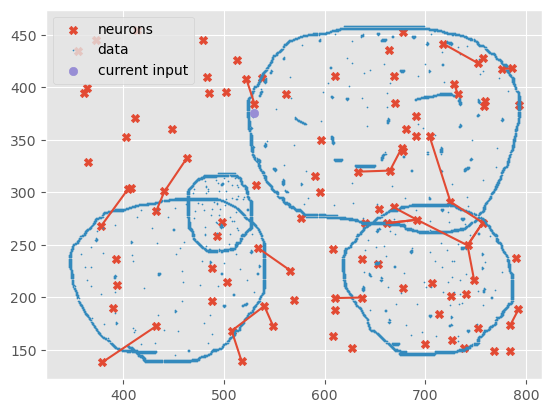

iter:  30


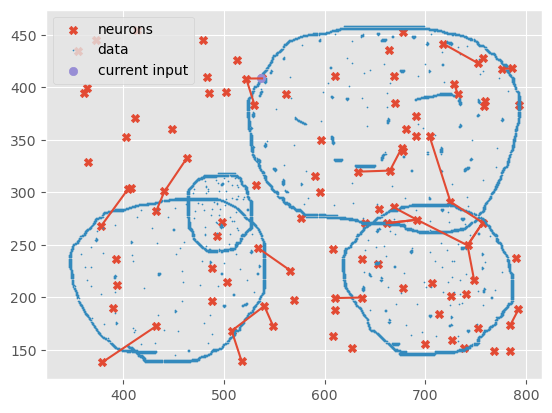

iter:  31


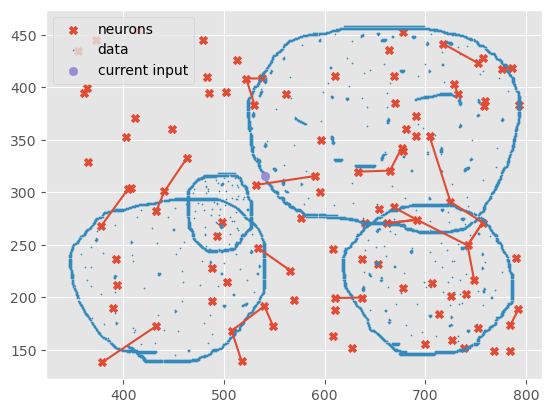

iter:  32


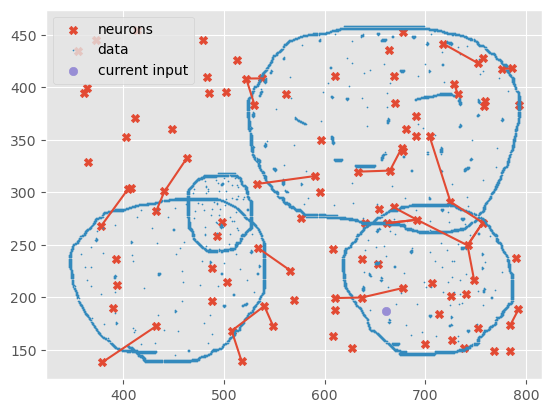

iter:  33


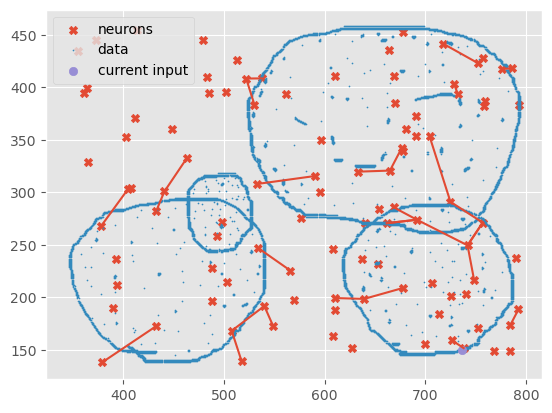

iter:  34


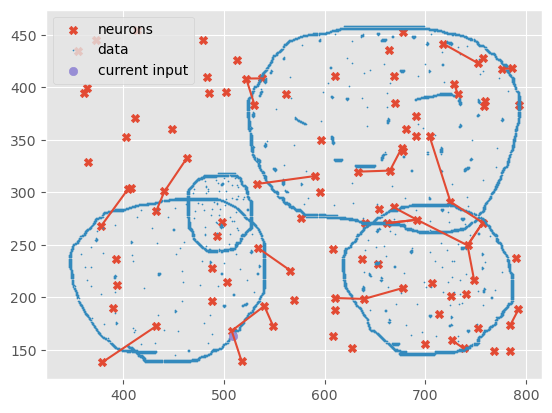

iter:  35


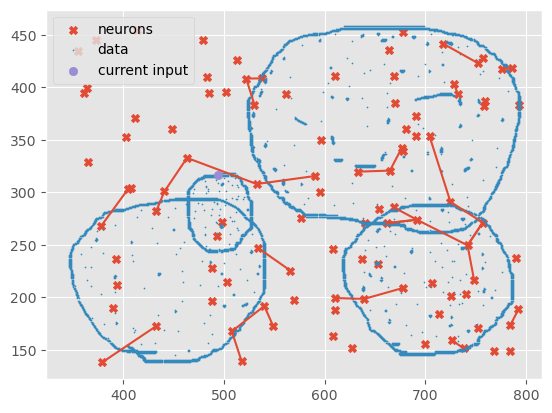

iter:  36


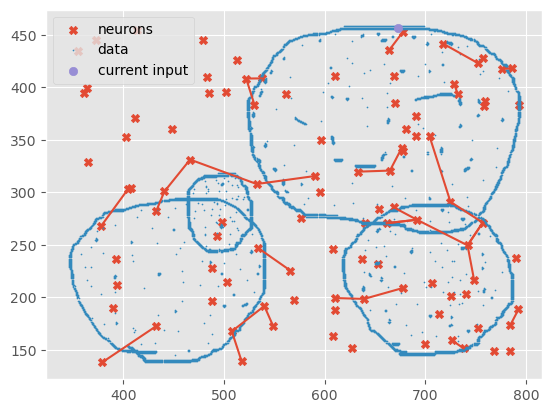

iter:  37


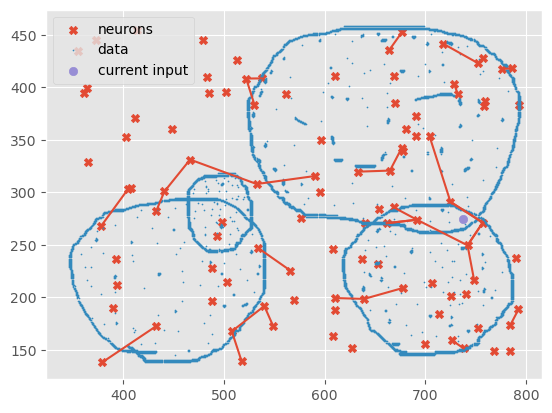

iter:  38


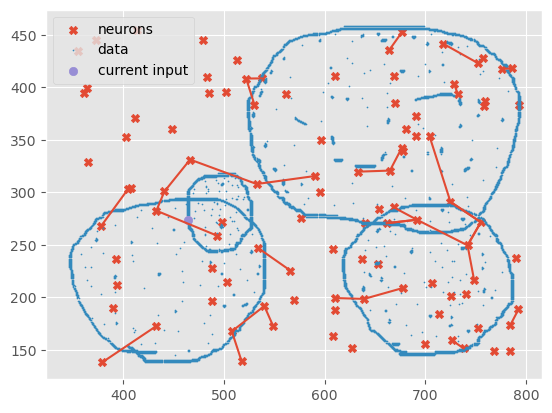

iter:  39


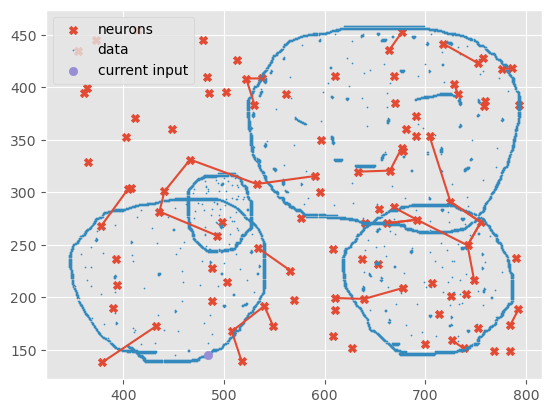

iter:  40


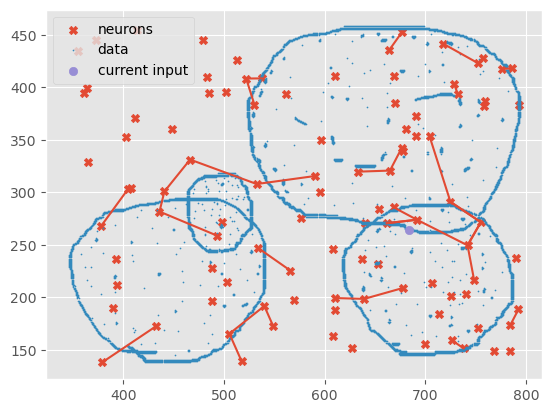

iter:  41


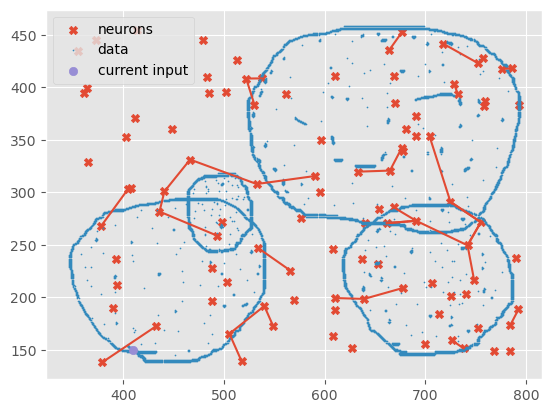

iter:  42


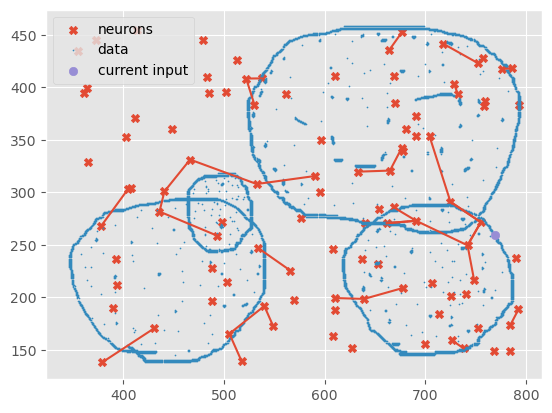

iter:  43


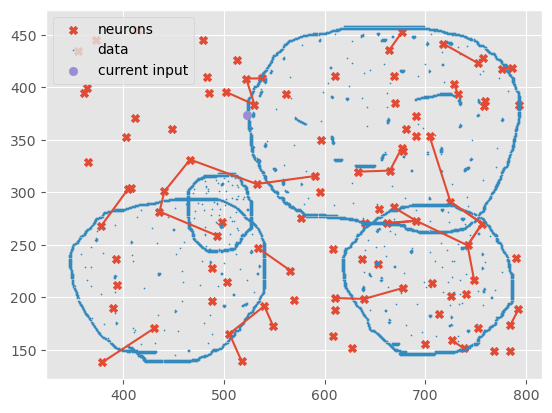

iter:  44


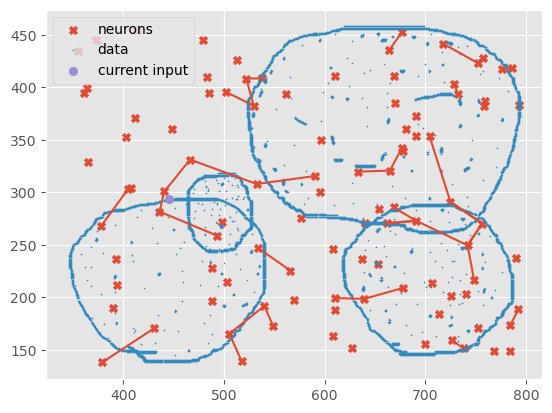

iter:  45


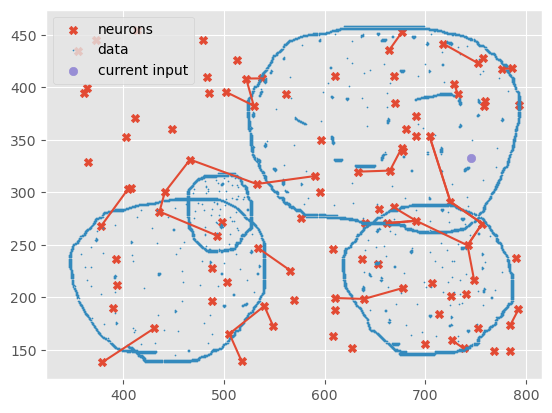

iter:  46


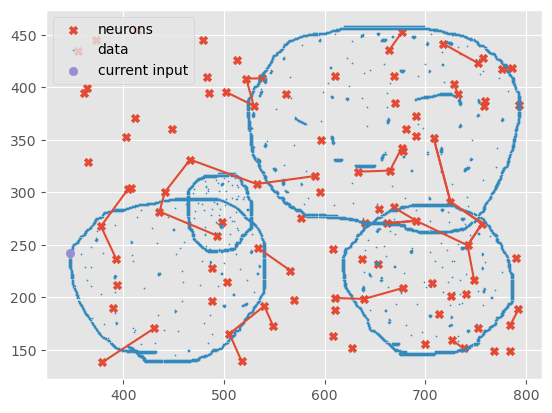

iter:  47


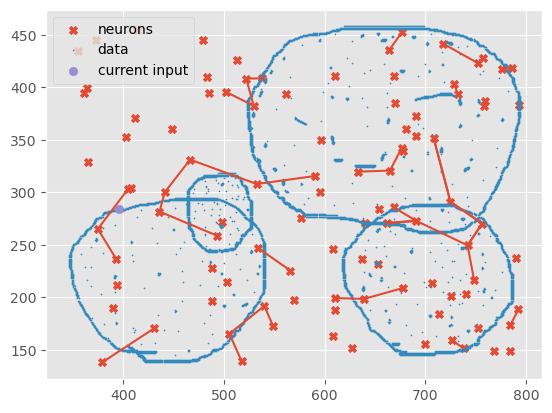

iter:  48


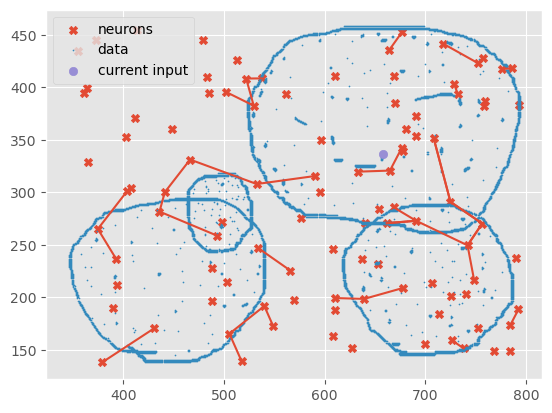

iter:  49


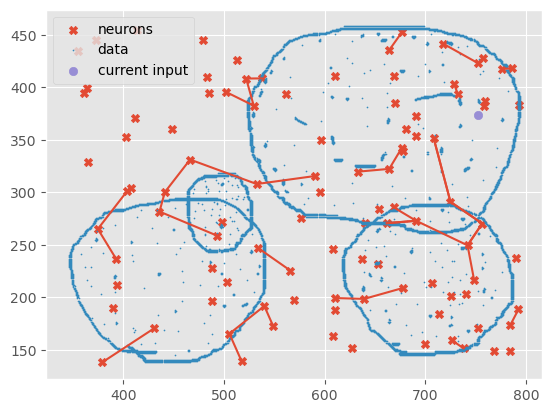

iter:  50


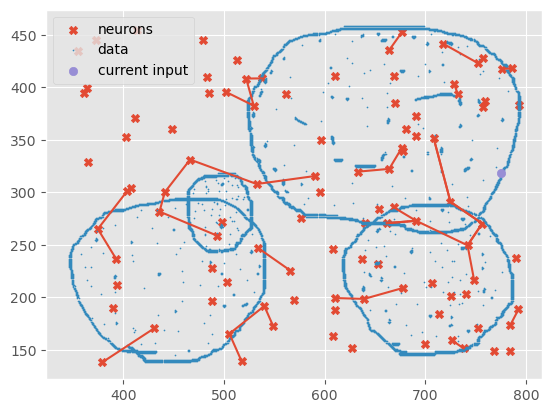

iter:  51


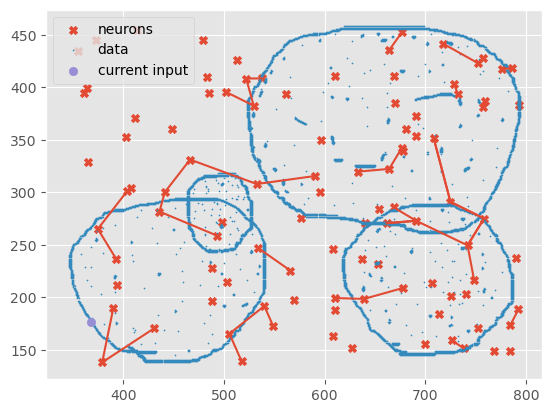

iter:  52


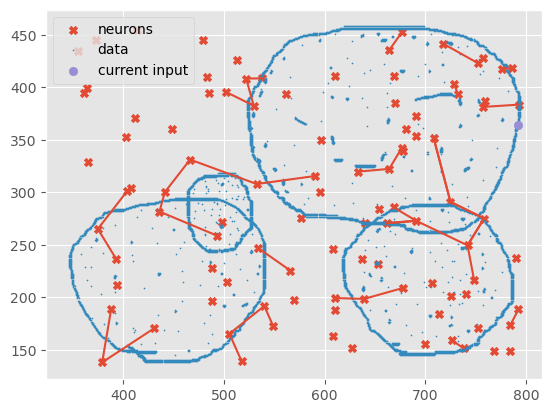

iter:  53


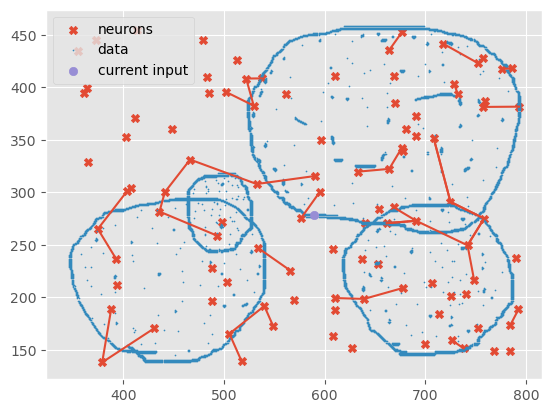

iter:  54


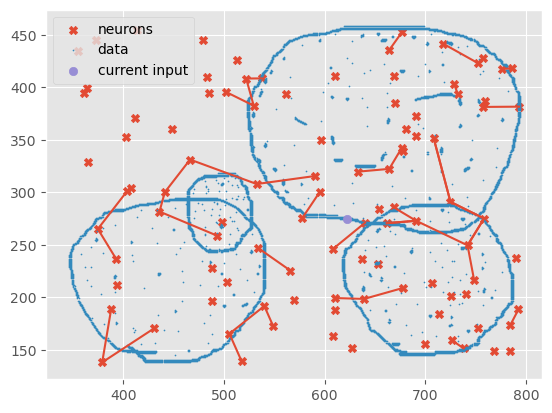

iter:  55


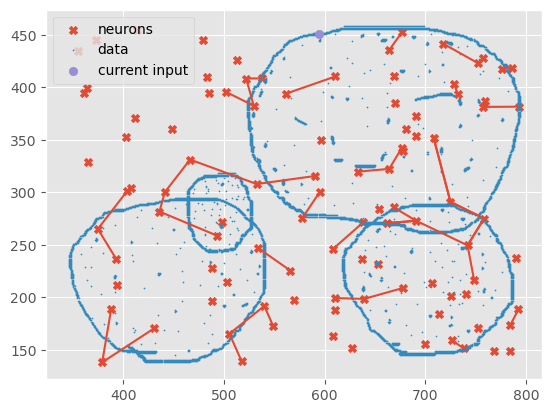

iter:  56


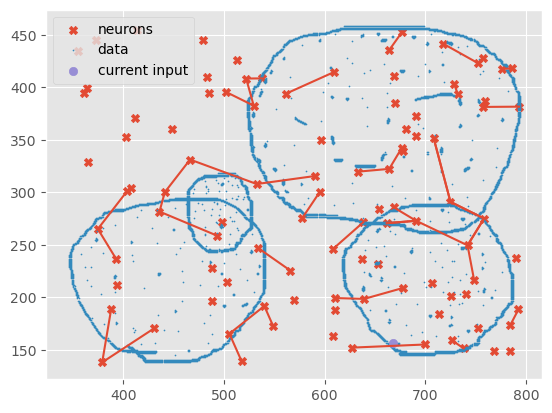

iter:  57


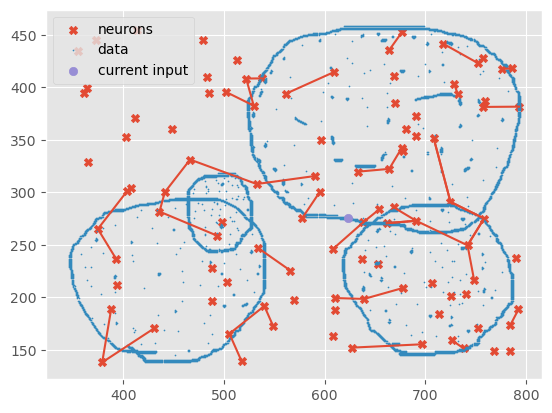

iter:  58


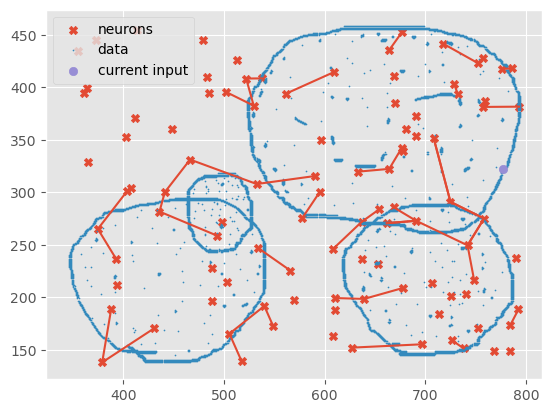

iter:  59


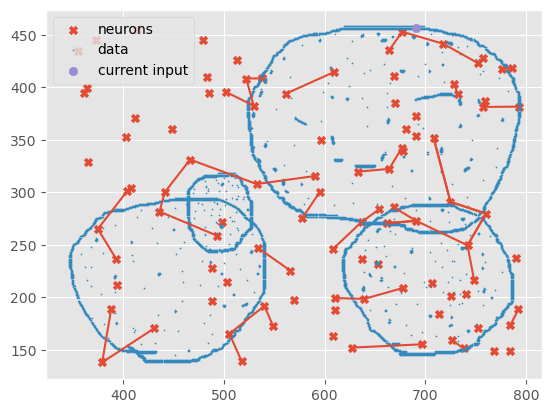

iter:  60


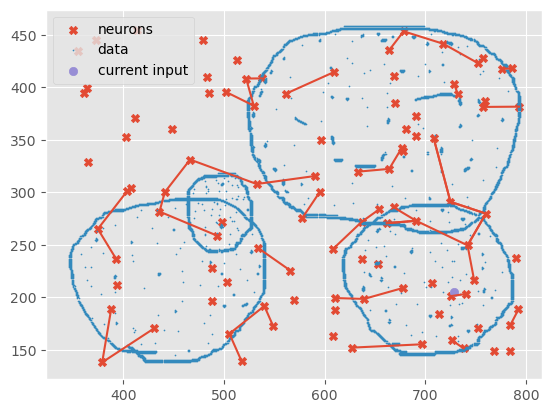

iter:  61


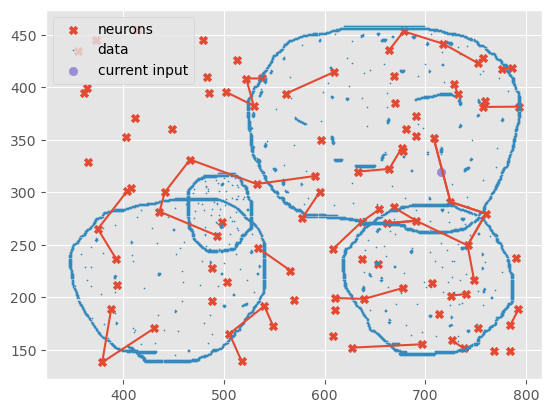

iter:  62


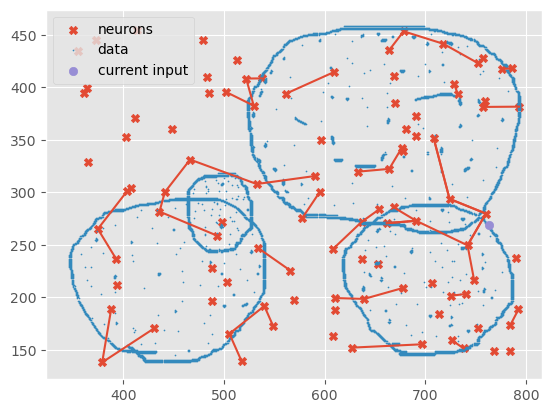

iter:  63


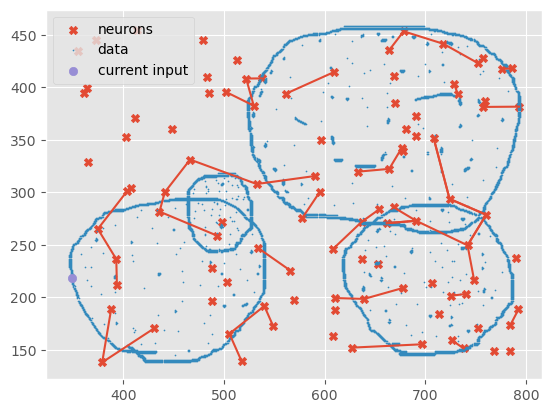

iter:  64


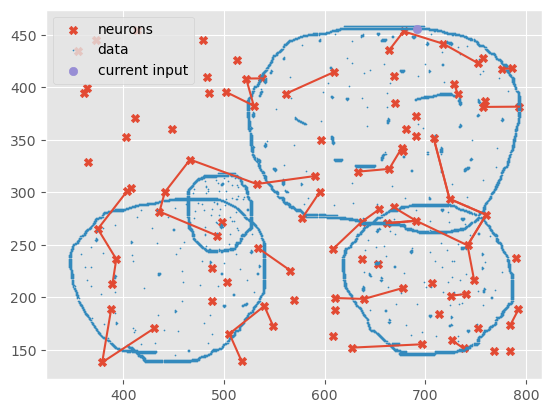

iter:  65


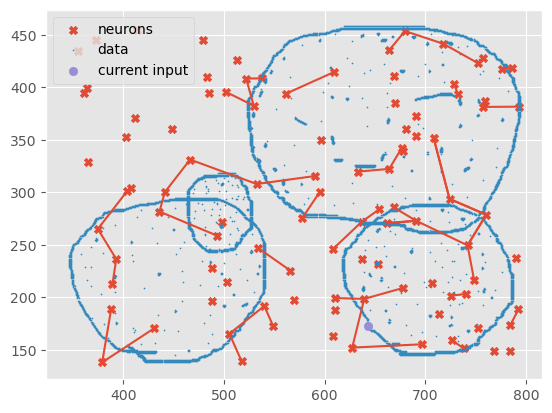

iter:  66


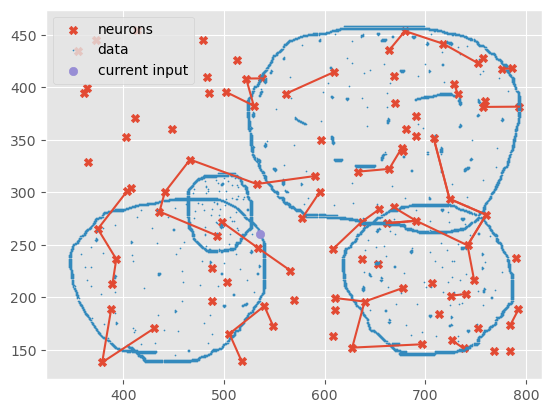

iter:  67


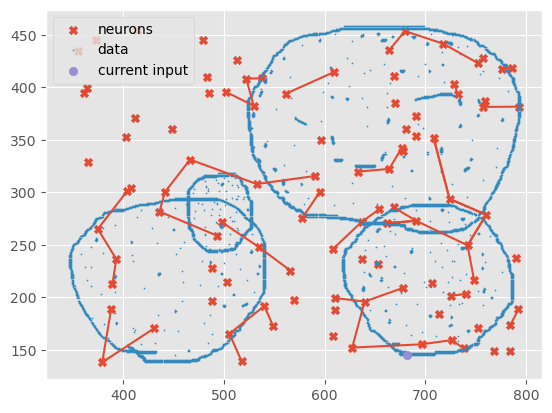

iter:  68


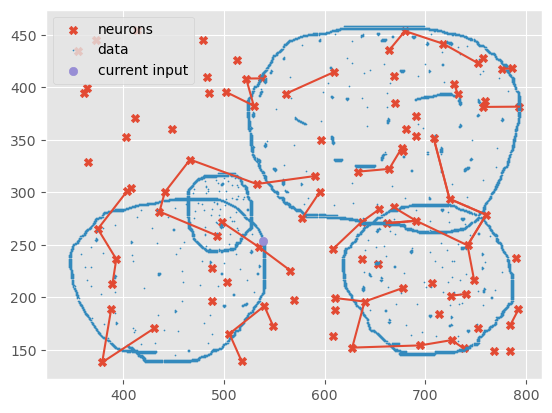

iter:  69


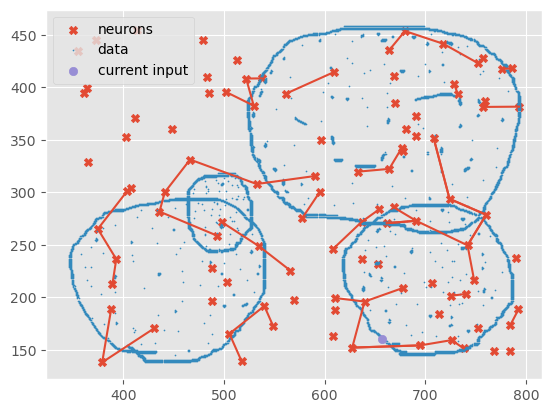

iter:  70


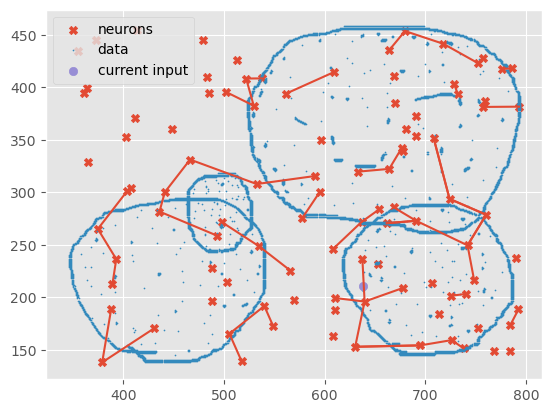

iter:  71


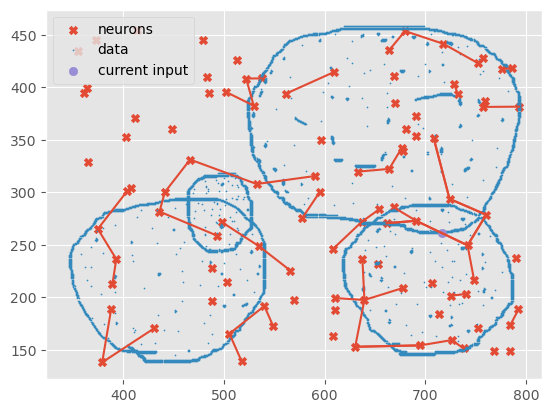

iter:  72


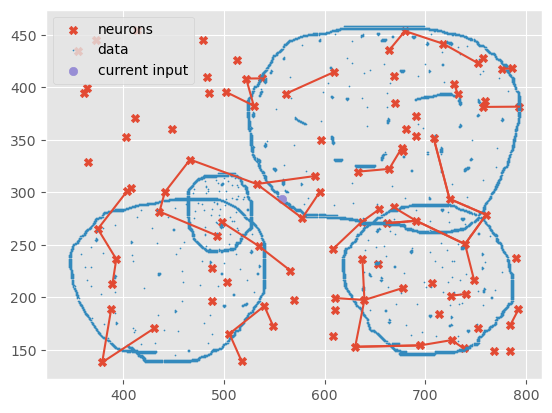

iter:  73


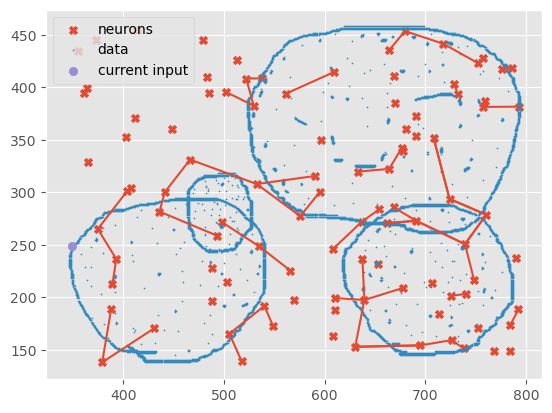

iter:  74


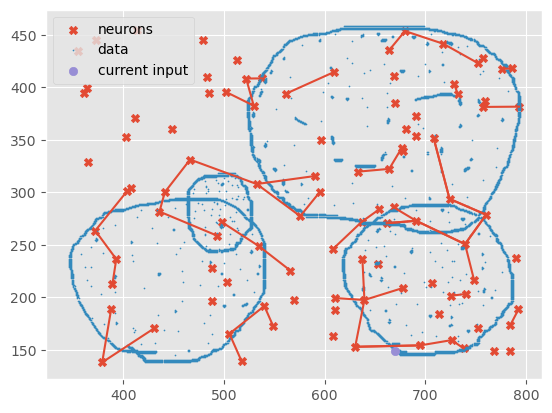

iter:  75


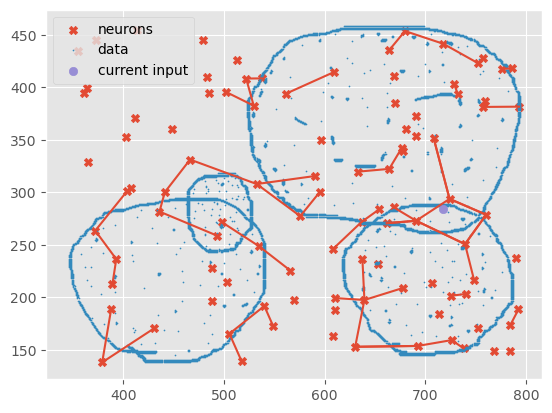

iter:  76


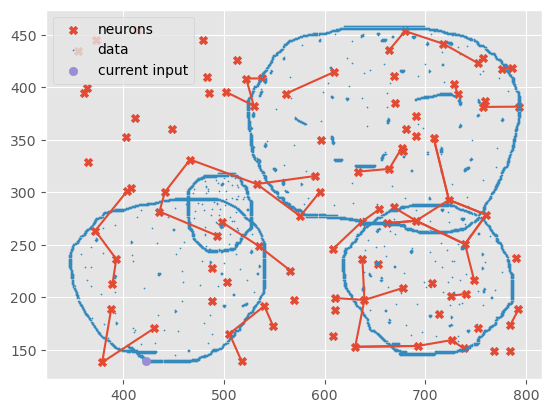

iter:  77


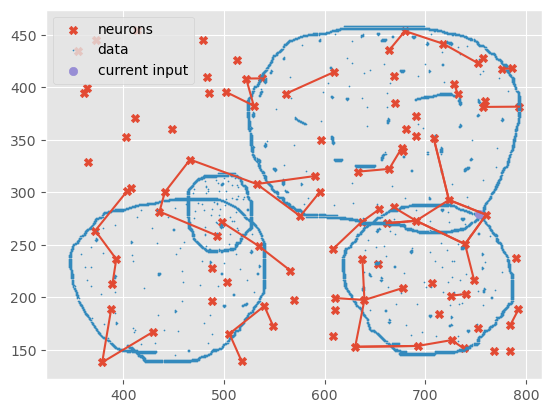

iter:  78


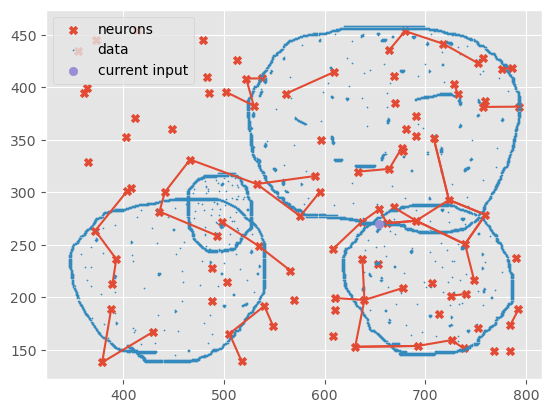

iter:  79


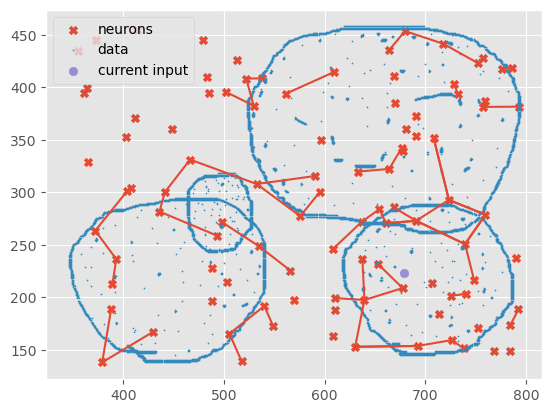

iter:  80


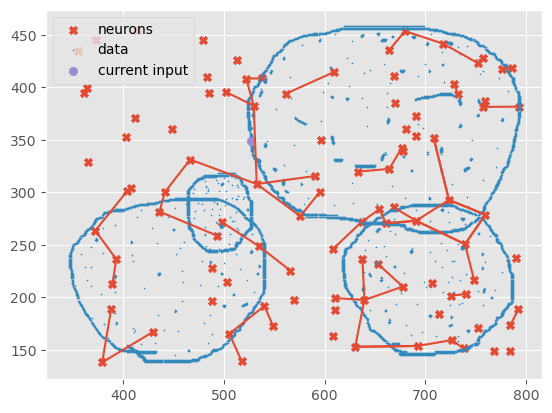

iter:  81


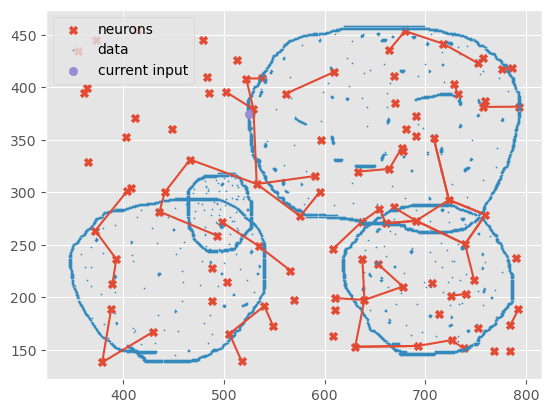

iter:  82


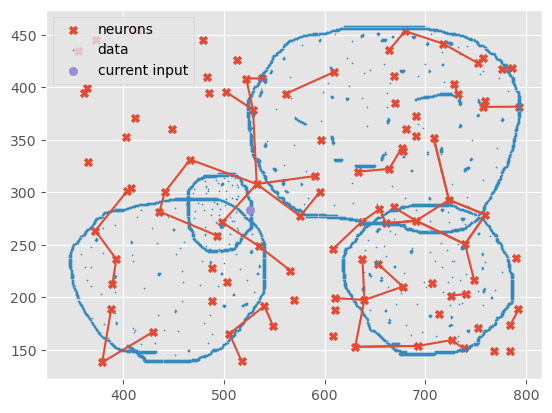

iter:  83


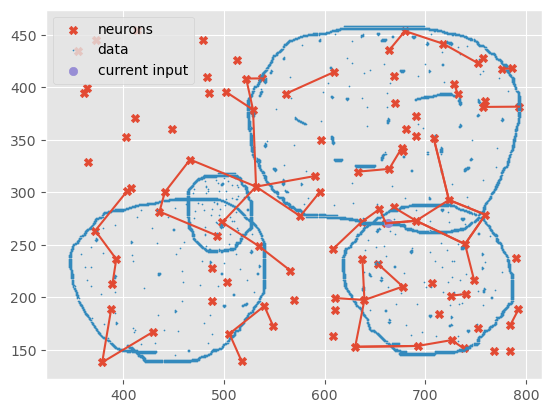

iter:  84


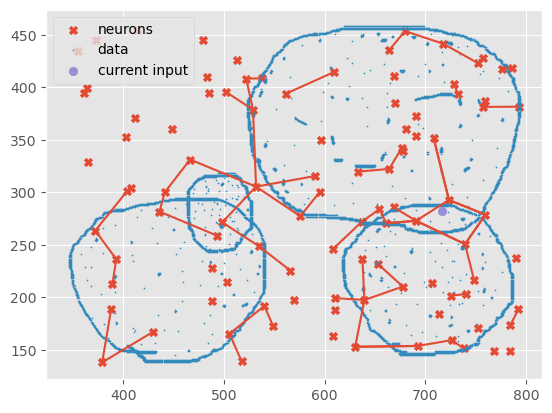

iter:  85


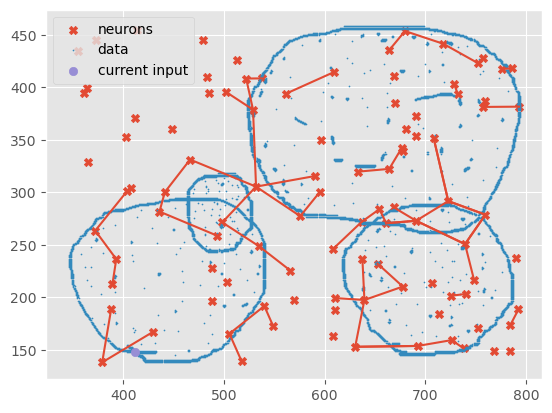

iter:  86


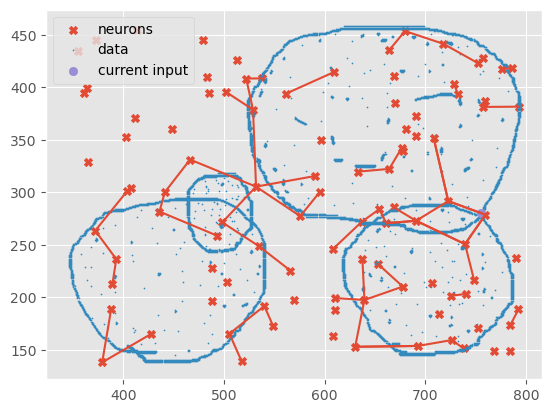

iter:  87


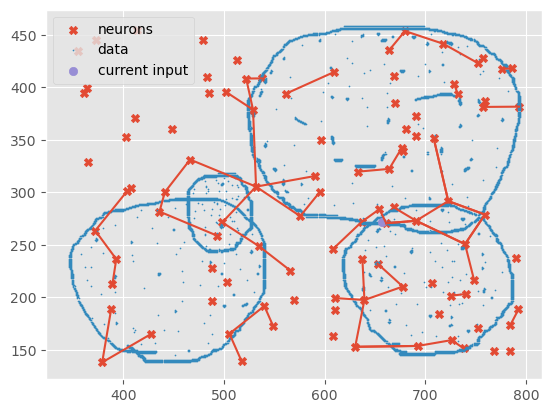

iter:  88


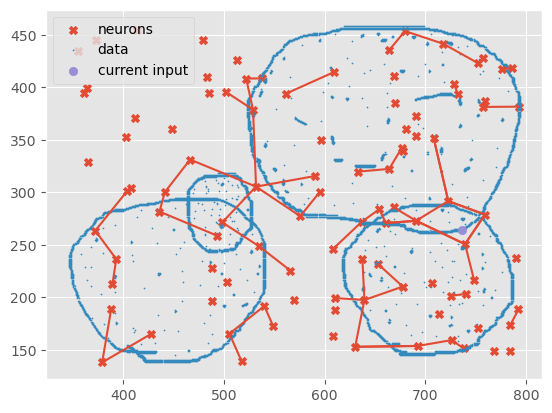

iter:  89


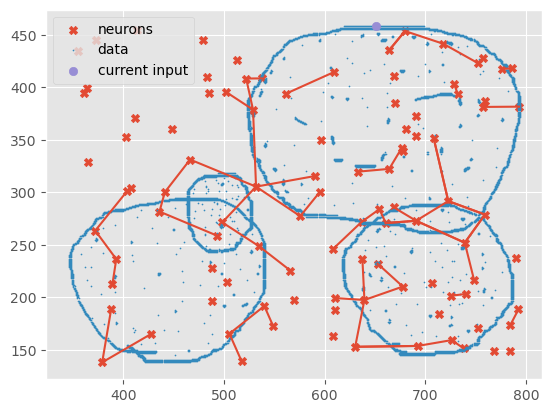

iter:  90


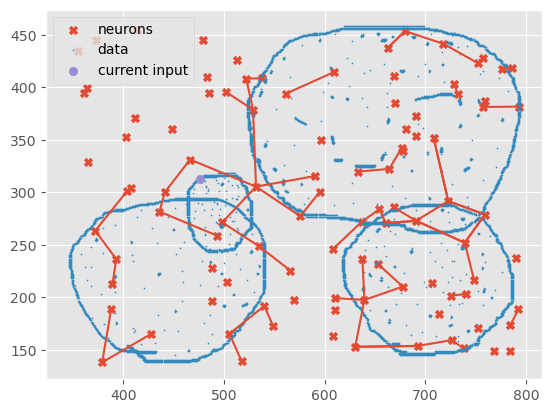

iter:  91


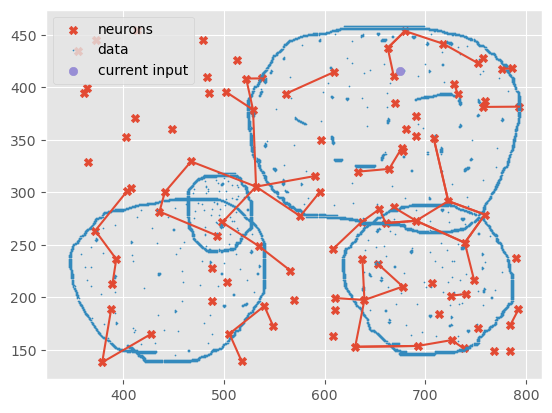

iter:  92


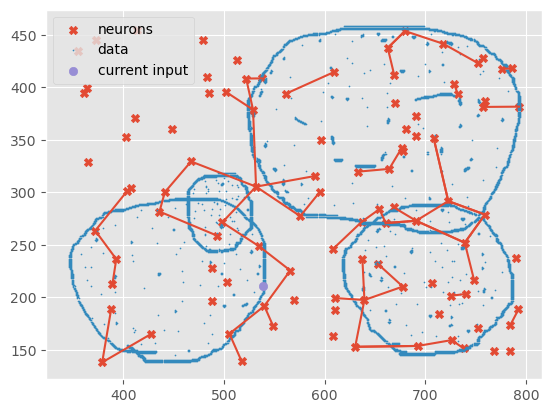

iter:  93


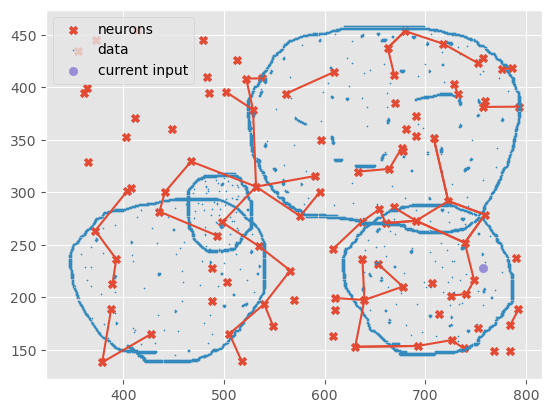

iter:  94


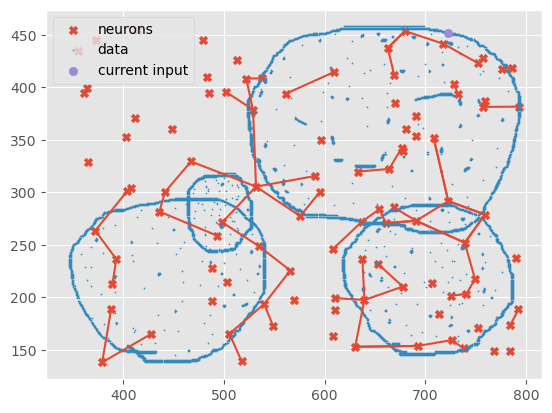

iter:  95


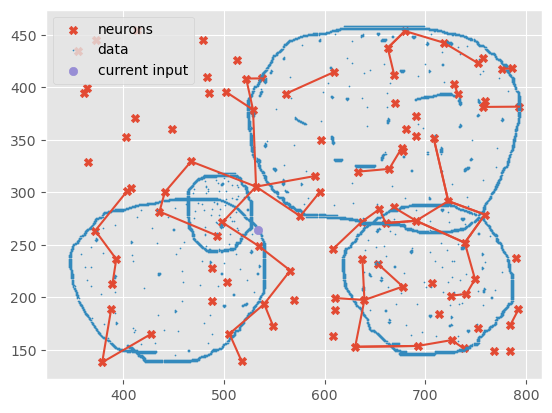

iter:  96


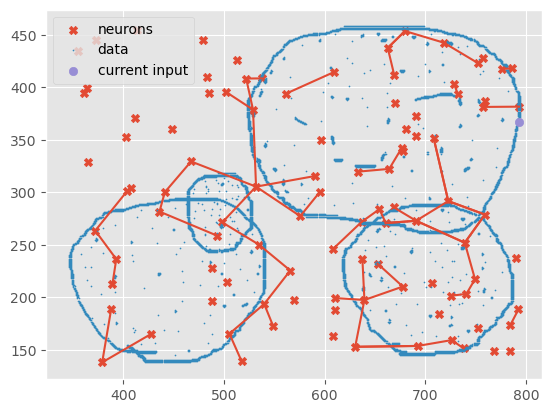

iter:  97


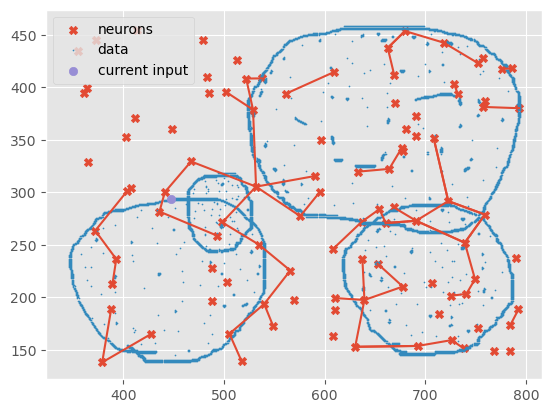

iter:  98


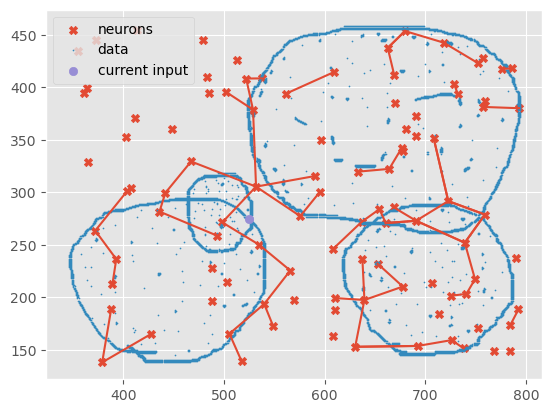

iter:  99


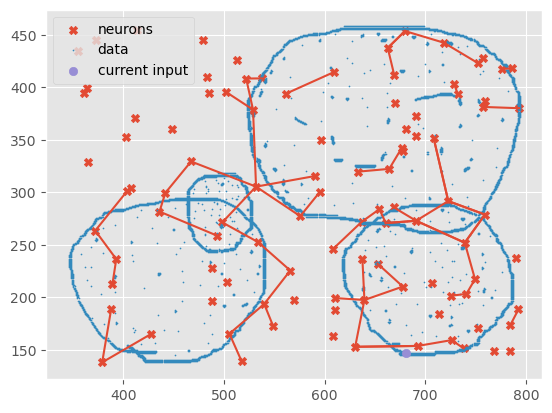

In [55]:
# convert data to numpy 
data = df['coordinate'].to_list()
data = np.array(data)
print(data)
plt.figure()

plt.scatter(data[:,0], data[:,1], s=0.5)
plt.title("Data")
plt.show()

neural_gas = NeuralGas(data=data,
                       neurons_n=100,
                       lifetime=10,
                       epsilon=0.1,
                       _lambda=0.1,
                       max_iter=100)

neural_gas.plot()

neural_gas.run()

# Test with a few codebooks and 1 input

connections
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
neurons =  [[0.20492369 0.34169811]
 [0.67624248 0.87923476]
 [0.54367805 0.28269965]
 [0.03023526 0.71033683]
 [0.0078841  0.37267907]]
input =  [[0.53053721 0.92211146]]
distances
[0.6655102  0.15188297 0.63954683 0.54327759 0.75831539]
Sorted indices for distances
[1 3 2 0 4]
closest neuron =  [0.67624248 0.87923476]
closest neuron =  [0.03023526 0.71033683]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


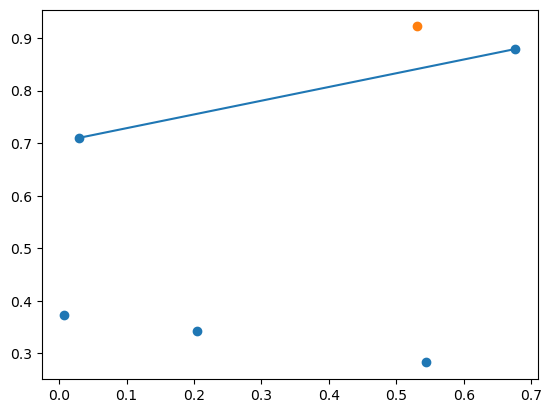

In [ ]:
# test

# create sample neurons and an input
neurons = np.random.rand(5,2) # 5 neurons
input = np.random.rand(1,2) # 1 input

# initialize connection matrix
connections = np.zeros((neurons.shape[0], neurons.shape[0]))
print("connections")
print(connections)

plt.figure()
plt.scatter(neurons[:,0], neurons[:,1])
plt.scatter(input[0][0], input[0][1])


# calculate distances
print("neurons = ", neurons)
print("input = ", input)
print("distances")
distances = np.linalg.norm(neurons-input, axis=1)
print(distances)

# sort distances 
print("Sorted indices for distances")
sorted_indices = np.argsort(distances)
print(sorted_indices)

# find closest and second closest neurons/codebooks/prototypes
closest_neuron = neurons[sorted_indices[0]]
second_closest_neuron = neurons[sorted_indices[1]]
print("closest neuron = ", closest_neuron)
print("closest neuron = ", second_closest_neuron)

# make connection and plot connection
connections[sorted_indices[0], sorted_indices[1]] = 1 # change on the upper triange
print(connections)

x_coords = [closest_neuron[0], second_closest_neuron[0]]
y_coords = [closest_neuron[1], second_closest_neuron[1]]

plt.plot(x_coords, y_coords)
plt.show()


# Test with a few codebooks and 2 inputs

In [ ]:
# test
np.random.seed(0)
# create sample neurons and an input
weights = np.random.rand(5,2)
X = np.random.rand(2,2)

connections = np.zeros((weights.shape[0], weights.shape[0]))
lifetimes = np.zeros_like(connections)

print("connections")
print(connections)
print("lifetimes")
print(lifetimes)



connections
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
lifetimes
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


---
Iteration  0
neurons =  [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]
inputs =  [[0.79172504 0.52889492]
 [0.56804456 0.92559664]]
distances
[[0.30612356 0.18963685 0.38621822 0.50704448 0.2252094 ]
 [0.2112843  0.38229325 0.31477278 0.13477076 0.67115269]]
Sorted indices for distances
[[1 4 0 2 3]
 [3 0 2 1 4]]
closest neurons =  [[0.60276338 0.54488318]
 [0.43758721 0.891773  ]]
second closest neurons =  [[0.96366276 0.38344152]
 [0.5488135  0.71518937]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0
[0.54881359 0.71519032]
1
[0.60276338 0.54488318]
2
[0.4236548  0.64589411]
3
[0.45063295 0.89515536]
4
[0.96366276 0.38344152]
---
Iteration  1
neurons =  [[0.54881359 0.71519032]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.45063295 0.89515536]
 [0.96366276 0.

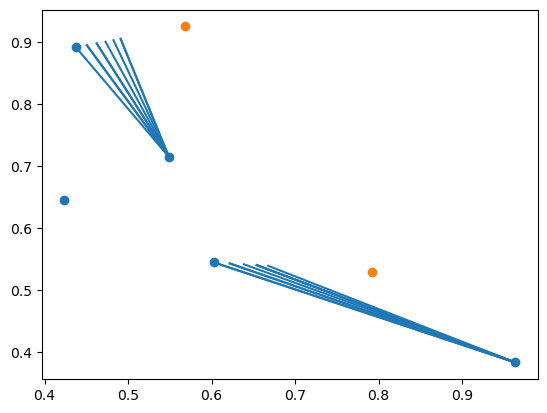

In [ ]:
fig, ax = plt.subplots()
ax.scatter(weights[:,0], weights[:,1])
ax.scatter(X[:,0], X[:,1])

max_iter = 10
eps = 0.1
lambda_ = 0.1
max_lifetime = 5

for iter in range(max_iter):
    print("---")
    print("Iteration ", iter)

    # calculate distances
    print("neurons = ", weights)
    print("inputs = ", X)
    print("distances")
    distances = np.array([np.linalg.norm(weights-x, axis=1) for x in X])
    print(distances)

    # sort distances 
    print("Sorted indices for distances")
    ranking = np.argsort(distances)
    print(ranking)

    # find closest and second closest neurons/weights/prototypes
    closest_neurons = weights[ranking[:,0]]
    second_closest_neurons = weights[ranking[:,1]]
    print("closest neurons = ", closest_neurons)
    print("second closest neurons = ", second_closest_neurons)

    # make connection and plot connection
    # update connection matrix
    for i in range(len(X)):

        if connections[ranking[i][0], ranking[i][1]] != 1: # if connection doesn't exist
            connections[ranking[i][0], ranking[i][1]] = 1 # make connection
            lifetimes[ranking[i][0], ranking[i][1]] += 1 # increase age
        else: # if connection exists
            if lifetimes[ranking[i][0], ranking[i][1]] == max_lifetime: # if lifetime is at its max
                connections[ranking[i][0], ranking[i][1]] = 0 # break connection
                lifetimes[ranking[i][0], ranking[i][1]] = 0 # reset age
            else: # if lifetime is not at its max
                lifetimes[ranking[i][0], ranking[i][1]] += 1 # increase age

    print(connections)
    print(lifetimes)

    # loop over connection matrix and find neurons to connect. Then connect them in the plot
    for r in range(connections.shape[0]):
        for c in range(connections.shape[1]):
            if connections[r,c] == 1:
                codebook1 = weights[r]
                codebook2 = weights[c]

                x_coords = [codebook1[0], codebook2[0]]
                y_coords = [codebook1[1], codebook2[1]]

                line = mlines.Line2D(x_coords, y_coords)
                ax.add_line(line)

    # select random input & update weights
    sampled_input_idx = np.random.randint(0, len(X))
    sampled_input = X[sampled_input_idx]

    for i in range(len(weights)):
        print(i)
        # determine k: number of neurons closer to sampled input v than w itself
        k = np.where(ranking[sampled_input_idx] == i)[0]
        # update weight
        weights[i] = weights[i] + eps * np.exp(-k/lambda_)*(sampled_input - weights[i])
        print(weights[i])
plt.show()
